In [2]:
import os  # type:ignore # isort:skip # fmt:skip # noqa # nopep8
import sys  # type:ignore # isort:skip # fmt:skip # noqa # nopep8
from pathlib import Path  # type:ignore # isort:skip # fmt:skip # noqa # nopep8

mod = sys.modules[__name__]

code_dir = None
code_dir_name = 'Code'
unwanted_subdir_name = 'Analysis'

for _ in range(5):

    parent_path = str(Path.cwd().parents[_]).split('/')[-1]

    if (code_dir_name in parent_path) and (unwanted_subdir_name not in parent_path):

        code_dir = str(Path.cwd().parents[_])

        if code_dir is not None:
            break

sys.path.append(code_dir)
# %load_ext autoreload
# %autoreload 2


In [3]:
from setup_module.imports import *  # type:ignore # isort:skip # fmt:skip # noqa # nopep8


Using MPS


0it [00:00, ?it/s]

<Figure size 640x480 with 0 Axes>

In [4]:
# Variables
alpha = 0.050
normality_tests_labels = ['Statistic', 'p-value']
ngrams_list=[1, 2, 3, 123]
embedding_libraries_list = ['spacy', 'nltk', 'gensim']
ivs = ['Gender', 'Age']
ivs_all = [
    'Gender',
    'Gender_Num',
    'Gender_Female',
    'Gender_Mixed',
    'Gender_Male',
    'Age',
    'Age_Num',
    'Age_Older',
    'Age_Mixed',
    'Age_Younger',
]
ivs_all_dummy_num = [
    'Gender_Num',
    'Gender_Female',
    'Gender_Mixed',
    'Gender_Male',
    'Age_Num',
    'Age_Older',
    'Age_Mixed',
    'Age_Younger',
]
ivs_all_dummy = [
    'Gender_Female',
    'Gender_Mixed',
    'Gender_Male',
    'Age_Older',
    'Age_Mixed',
    'Age_Younger',
]
ivs_gender_dummy_num = [
    'Gender_Num',
    'Gender_Female',
    'Gender_Mixed',
    'Gender_Male',
]
ivs_gender_dummy = [
    'Gender_Female',
    'Gender_Mixed',
    'Gender_Male',
]
ivs_age_dummy_num = [
    'Age_Num',
    'Age_Older',
    'Age_Mixed',
    'Age_Younger',
]
ivs_age_dummy_num = [
    'Age_Older',
    'Age_Mixed',
    'Age_Younger',
]
gender_order = ['Female', 'Mixed Gender', 'Male']
age_order = ['Older', 'Mixed Age', 'Younger']
ivs_dict = {'Gender': gender_order, 'Age': age_order}

dvs = [
    'Warmth', 'Competence'
]

cat_list = [
    'Job ID',
    'Gender',
    'Gender_Female',
    'Gender_Male',
    'Gender_Mixed',
    'Age',
    'Age_Older',
    'Age_Younger',
    'Gender_Mixed',
    'Language',
    'English Requirement',
    'Dutch Requirement'
]

# Plotting variables
pp = pprint.PrettyPrinter(indent=4)
tqdm.tqdm.pandas(desc='progress-bar')
tqdm_auto.tqdm.pandas(desc='progress-bar')
# tqdm.notebook.tqdm().pandas(desc='progress-bar')
tqdm_auto.notebook_tqdm().pandas(desc='progress-bar')
# pbar = progressbar.ProgressBar(maxval=10)
mpl.style.use(f'{code_dir}/setup_module/apa.mplstyle-main/apa.mplstyle')
mpl.rcParams['text.usetex'] = False
font = {'family': 'arial', 'weight': 'normal', 'size': 10}
mpl.rc('font', **font)
plt.style.use('tableau-colorblind10')
plt.set_cmap('Blues')
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 5000)
pd.set_option('display.colheader_justify', 'center')
pd.set_option('display.precision', 3)
pd.set_option('display.float_format', '{:.2f}'.format)


0it [00:00, ?it/s]

<Figure size 640x480 with 0 Axes>

# Functions

### READ DATA

In [5]:
with open(f'{data_dir}df_manual_len.txt', 'rb') as f:
    df_manual_len = int(pickle.load(f))

df_manual = pd.read_pickle(f'{df_save_dir}df_manual_for_trainning.pkl').reset_index(drop=True)
assert len(df_manual) == df_manual_len, f'DATAFRAME MISSING DATA! DF SHOULD BE OF LENGTH {df_manual_len} BUT IS OF LENGTH {len(df_manual)}'


╭─────────────────────────────── Traceback (most recent call last) ────────────────────────────────╮
│ /var/folders/46/q15p556n1dd63z6gkwyh896c0000gn/T/ipykernel_36214/4049995145.py:2 in <module>     │
│                                                                                                  │
│ [Errno 2] No such file or directory:                                                             │
│ '/var/folders/46/q15p556n1dd63z6gkwyh896c0000gn/T/ipykernel_36214/4049995145.py'                 │
╰──────────────────────────────────────────────────────────────────────────────────────────────────╯
AssertionError: DATAFRAME MISSING DATA! DF SHOULD BE OF LENGTH 5379 BUT IS OF LENGTH 5978

# Analysis

## ANOVA

In [6]:
dataframes = {
    'df_manual': df_manual,
}

++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
====== RESULTS FOR df_manual ======


  0%|          | 0/4 [00:00<?, ?it/s]

++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
Dependent Variable: Warmth
Independent Variable: Gender
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++


--------------------
FREQUENCIES
IVs: Gender
  Variable    Outcome     Count  Percent
0  Gender   Mixed Gender  4682   78.32  
1                   Male   664   11.11  
2                 Female   632   10.57  
--------------------


--------------------
DVs: Warmth


  Variable     N    Mean  SD   SE   95% Conf.  Interval
0  Warmth  5978.00  0.25 0.43 0.01    0.24       0.26  


/opt/homebrew/Caskroom/mambaforge/base/envs/study1_3.10/lib/python3.10/site-packages/researchpy/summary.py:225: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for ix, df_col in group1.iteritems():
/opt/homebrew/Caskroom/mambaforge/base/envs/study1_3.10/lib/python3.10/site-packages/researchpy/summary.py:60: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for ix, df_col in group1.iteritems():


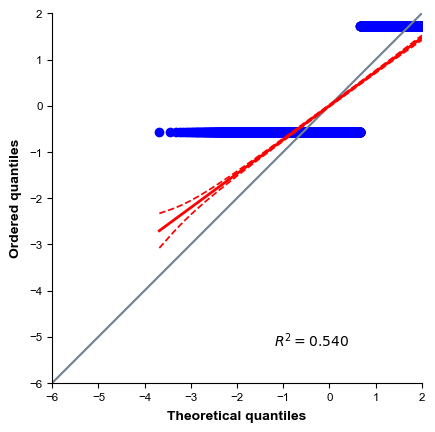

--------------------


Warmth Test of Normality:
--------------------------------------------------------------------------------
Statistic :  1154.3094734469366
p-value :  2.2124967258058945e-251


Warmth Skewness-Kurtosis Test of Normality:
--------------------------------------------------------------------------------
Statistic :  -16.871039637151082
p-value :  7.349144314203956e-64


Warmth Shapir-Wilk Test of Normality:
--------------------------------------------------------------------------------
Statistic :  0.5393526554107666
p-value :  0.0


Warmth Anderson-Darling Test of Normality:
--------------------------------------------------------------------------------
Statistic :  1431.9619996405572
p-value :  [0.576 0.656 0.786 0.917 1.091]


NORMALITY TEST


~~~~~~~~~~~~~~~~~~~~
Gender x Warmth


/opt/homebrew/Caskroom/mambaforge/base/envs/study1_3.10/lib/python3.10/site-packages/scipy/stats/_morestats.py:1816: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


Gender x Warmth Normality test:
               W   pval  normal
Gender                         
Mixed Gender 0.54  0.00   False
Female       0.55  0.00   False
Male         0.49  0.00   False
~~~~~~~~~~~~~~~~~~~~


SPHERICITY TEST


~~~~~~~~~~~~~~~~~~~~
Gender x Warmth


/opt/homebrew/Caskroom/mambaforge/base/envs/study1_3.10/lib/python3.10/site-packages/pingouin/distribution.py:1002: FutureWarning: The default value of numeric_only in DataFrame.cov is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  S = data.cov().to_numpy()  # NumPy, otherwise S.mean() != grandmean
/opt/homebrew/Caskroom/mambaforge/base/envs/study1_3.10/lib/python3.10/site-packages/pingouin/distribution.py:1006: RuntimeWarning: overflow encountered in scalar power
  W = np.product(eig) / (eig.sum() / d) ** d
/opt/homebrew/Caskroom/mambaforge/base/envs/study1_3.10/lib/python3.10/site-packages/pingouin/distribution.py:1007: RuntimeWarning: divide by zero encountered in log
  logW = np.log(W)
/var/folders/46/q15p556n1dd63z6gkwyh896c0000gn/T/ipykernel_36214/18462124.py:129: DeprecationWarning: Please use `f_oneway` from the `scipy.stats` namespace, the `scipy.stats.stats` namespace is depr

--------------------
Gender x Warmth Sphericity test:
True at p-value: 1.0, chi-square: -inf, degrees of freedom: 24309, Test statistic: 0
~~~~~~~~~~~~~~~~~~~~


LEVENE'S TEST


~~~~~~~~~~~~~~~~~~~~
Gender x Warmth
Gender x Warmth Levene's test:
         W   pval  equal_var
levene 4.72  0.01    False  
~~~~~~~~~~~~~~~~~~~~


BARTLETT'S TEST


~~~~~~~~~~~~~~~~~~~~
Gender x Warmth
Gender x Warmth Bartlett's test:
           T   pval  equal_var
bartlett 7.77  0.02    False  
~~~~~~~~~~~~~~~~~~~~


ANOVA SIGNIFICANCE


~~~~~~~~~~~~~~~~~~~~
Gender x Warmth
--------------------
One-way ANOVA p-value: 0.008945054078433755. Rejected: True
~~~~~~~~~~~~~~~~~~~~
SUMMARY ANOVA


~~~~~~~~~~~~~~~~~~~~
Gender x Warmth


                N   Mean  SD   SE   95% Conf.  Interval
Gender                                                 
Female         632  0.27 0.44 0.02    0.23       0.30  
Male           664  0.20 0.40 0.02    0.17       0.23  
Mixed Gender  4682  0.26 0.44 0.01    0.24       0.27  
~~~~~

/opt/homebrew/Caskroom/mambaforge/base/envs/study1_3.10/lib/python3.10/site-packages/researchpy/summary.py:225: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for ix, df_col in group1.iteritems():
/opt/homebrew/Caskroom/mambaforge/base/envs/study1_3.10/lib/python3.10/site-packages/researchpy/summary.py:60: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for ix, df_col in group1.iteritems():


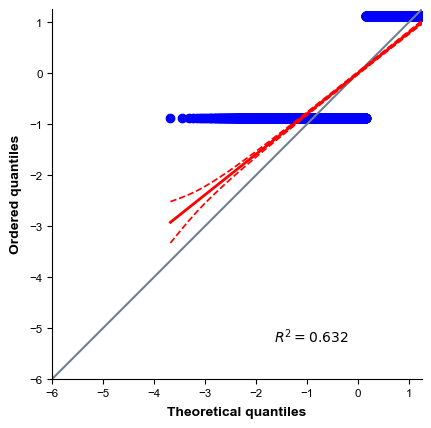

--------------------


Competence Test of Normality:
--------------------------------------------------------------------------------
Statistic :  21457.24324139242
p-value :  0.0


Competence Skewness-Kurtosis Test of Normality:
--------------------------------------------------------------------------------
Statistic :  146.2971919136091
p-value :  0.0


Competence Shapir-Wilk Test of Normality:
--------------------------------------------------------------------------------
Statistic :  0.6316381692886353
p-value :  0.0


Competence Anderson-Darling Test of Normality:
--------------------------------------------------------------------------------
Statistic :  1093.539522032238
p-value :  [0.576 0.656 0.786 0.917 1.091]


NORMALITY TEST


~~~~~~~~~~~~~~~~~~~~
Gender x Competence
Gender x Competence Normality test:
               W   pval  normal
Gender                         
Mixed Gender 0.63  0.00   False
Female       0.63  0.00   False
Male         0.64  0.00   False
~~~~~~~~~~~

/opt/homebrew/Caskroom/mambaforge/base/envs/study1_3.10/lib/python3.10/site-packages/scipy/stats/_morestats.py:1816: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")
/opt/homebrew/Caskroom/mambaforge/base/envs/study1_3.10/lib/python3.10/site-packages/pingouin/distribution.py:1002: FutureWarning: The default value of numeric_only in DataFrame.cov is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  S = data.cov().to_numpy()  # NumPy, otherwise S.mean() != grandmean
/opt/homebrew/Caskroom/mambaforge/base/envs/study1_3.10/lib/python3.10/site-packages/pingouin/distribution.py:1006: RuntimeWarning: overflow encountered in scalar power
  W = np.product(eig) / (eig.sum() / d) ** d
/opt/homebrew/Caskroom/mambaforge/base/envs/study1_3.10/lib/python3.10/site-packages/pingouin/distribution.py:1007: RuntimeWarning: divide by zero enco

--------------------
Gender x Competence Sphericity test:
True at p-value: 1.0, chi-square: -inf, degrees of freedom: 24309, Test statistic: 0
~~~~~~~~~~~~~~~~~~~~


LEVENE'S TEST


~~~~~~~~~~~~~~~~~~~~
Gender x Competence
Gender x Competence Levene's test:
         W   pval  equal_var
levene 3.68  0.03    False  
~~~~~~~~~~~~~~~~~~~~


BARTLETT'S TEST


~~~~~~~~~~~~~~~~~~~~
Gender x Competence
Gender x Competence Bartlett's test:
           T   pval  equal_var
bartlett 0.12  0.94    True   
~~~~~~~~~~~~~~~~~~~~


ANOVA SIGNIFICANCE


~~~~~~~~~~~~~~~~~~~~
Gender x Competence
--------------------
One-way ANOVA p-value: 0.025252356999474916. Rejected: True
~~~~~~~~~~~~~~~~~~~~
SUMMARY ANOVA


~~~~~~~~~~~~~~~~~~~~
Gender x Competence


                N   Mean  SD   SE   95% Conf.  Interval
Gender                                                 
Female         632  0.42 0.49 0.02    0.38       0.46  
Male           664  0.49 0.50 0.02    0.45       0.53  
Mixed Gender  4682  0.44 0.50 0.0

/opt/homebrew/Caskroom/mambaforge/base/envs/study1_3.10/lib/python3.10/site-packages/researchpy/summary.py:225: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for ix, df_col in group1.iteritems():
/opt/homebrew/Caskroom/mambaforge/base/envs/study1_3.10/lib/python3.10/site-packages/researchpy/summary.py:60: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for ix, df_col in group1.iteritems():


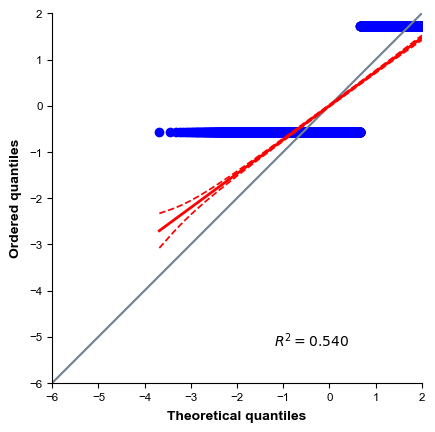

--------------------


Warmth Test of Normality:
--------------------------------------------------------------------------------
Statistic :  1154.3094734469366
p-value :  2.2124967258058945e-251


Warmth Skewness-Kurtosis Test of Normality:
--------------------------------------------------------------------------------
Statistic :  -16.871039637151082
p-value :  7.349144314203956e-64


Warmth Shapir-Wilk Test of Normality:
--------------------------------------------------------------------------------
Statistic :  0.5393526554107666
p-value :  0.0


Warmth Anderson-Darling Test of Normality:
--------------------------------------------------------------------------------
Statistic :  1431.9619996405572
p-value :  [0.576 0.656 0.786 0.917 1.091]


NORMALITY TEST


~~~~~~~~~~~~~~~~~~~~
Age x Warmth


/opt/homebrew/Caskroom/mambaforge/base/envs/study1_3.10/lib/python3.10/site-packages/scipy/stats/_morestats.py:1816: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


Age x Warmth Normality test:
            W   pval  normal
Age                         
Younger   0.54  0.00   False
Mixed Age 0.56  0.00   False
Older     0.48  0.00   False
~~~~~~~~~~~~~~~~~~~~


SPHERICITY TEST


~~~~~~~~~~~~~~~~~~~~
Age x Warmth


/opt/homebrew/Caskroom/mambaforge/base/envs/study1_3.10/lib/python3.10/site-packages/pingouin/distribution.py:1002: FutureWarning: The default value of numeric_only in DataFrame.cov is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  S = data.cov().to_numpy()  # NumPy, otherwise S.mean() != grandmean
/opt/homebrew/Caskroom/mambaforge/base/envs/study1_3.10/lib/python3.10/site-packages/pingouin/distribution.py:1006: RuntimeWarning: overflow encountered in scalar power
  W = np.product(eig) / (eig.sum() / d) ** d
/opt/homebrew/Caskroom/mambaforge/base/envs/study1_3.10/lib/python3.10/site-packages/pingouin/distribution.py:1007: RuntimeWarning: divide by zero encountered in log
  logW = np.log(W)
/var/folders/46/q15p556n1dd63z6gkwyh896c0000gn/T/ipykernel_36214/18462124.py:129: DeprecationWarning: Please use `f_oneway` from the `scipy.stats` namespace, the `scipy.stats.stats` namespace is depr

--------------------
Age x Warmth Sphericity test:
True at p-value: 1.0, chi-square: -inf, degrees of freedom: 24309, Test statistic: 0
~~~~~~~~~~~~~~~~~~~~


LEVENE'S TEST


~~~~~~~~~~~~~~~~~~~~
Age x Warmth
Age x Warmth Levene's test:
         W   pval  equal_var
levene 7.91  0.00    False  
~~~~~~~~~~~~~~~~~~~~


BARTLETT'S TEST


~~~~~~~~~~~~~~~~~~~~
Age x Warmth
Age x Warmth Bartlett's test:
            T   pval  equal_var
bartlett 12.88  0.00    False  
~~~~~~~~~~~~~~~~~~~~


ANOVA SIGNIFICANCE


~~~~~~~~~~~~~~~~~~~~
Age x Warmth
--------------------
One-way ANOVA p-value: 0.00037265665593049754. Rejected: True
~~~~~~~~~~~~~~~~~~~~
SUMMARY ANOVA


~~~~~~~~~~~~~~~~~~~~
Age x Warmth


             N   Mean  SD   SE   95% Conf.  Interval
Age                                                 
Mixed Age  2059  0.27 0.45 0.01    0.25       0.29  
Older       682  0.20 0.40 0.01    0.17       0.23  
Younger    3237  0.25 0.43 0.01    0.23       0.27  
~~~~~~~~~~~~~~~~~~~~


INTEACTION ANO

/opt/homebrew/Caskroom/mambaforge/base/envs/study1_3.10/lib/python3.10/site-packages/researchpy/summary.py:225: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for ix, df_col in group1.iteritems():
/opt/homebrew/Caskroom/mambaforge/base/envs/study1_3.10/lib/python3.10/site-packages/researchpy/summary.py:60: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for ix, df_col in group1.iteritems():


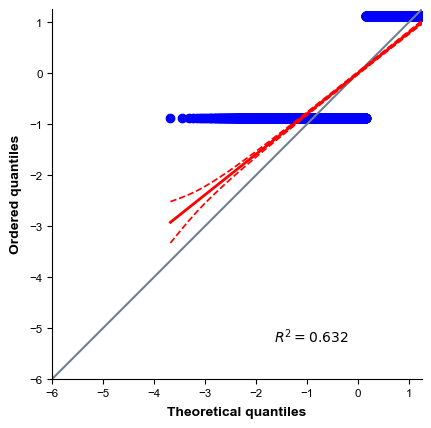

--------------------


Competence Test of Normality:
--------------------------------------------------------------------------------
Statistic :  21457.24324139242
p-value :  0.0


Competence Skewness-Kurtosis Test of Normality:
--------------------------------------------------------------------------------
Statistic :  146.2971919136091
p-value :  0.0


Competence Shapir-Wilk Test of Normality:
--------------------------------------------------------------------------------
Statistic :  0.6316381692886353
p-value :  0.0


Competence Anderson-Darling Test of Normality:
--------------------------------------------------------------------------------
Statistic :  1093.539522032238
p-value :  [0.576 0.656 0.786 0.917 1.091]


NORMALITY TEST


~~~~~~~~~~~~~~~~~~~~
Age x Competence
Age x Competence Normality test:
            W   pval  normal
Age                         
Younger   0.63  0.00   False
Mixed Age 0.63  0.00   False
Older     0.64  0.00   False
~~~~~~~~~~~~~~~~~~~~


SPHERICIT

/opt/homebrew/Caskroom/mambaforge/base/envs/study1_3.10/lib/python3.10/site-packages/scipy/stats/_morestats.py:1816: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")
/opt/homebrew/Caskroom/mambaforge/base/envs/study1_3.10/lib/python3.10/site-packages/pingouin/distribution.py:1002: FutureWarning: The default value of numeric_only in DataFrame.cov is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  S = data.cov().to_numpy()  # NumPy, otherwise S.mean() != grandmean
/opt/homebrew/Caskroom/mambaforge/base/envs/study1_3.10/lib/python3.10/site-packages/pingouin/distribution.py:1006: RuntimeWarning: overflow encountered in scalar power
  W = np.product(eig) / (eig.sum() / d) ** d
/opt/homebrew/Caskroom/mambaforge/base/envs/study1_3.10/lib/python3.10/site-packages/pingouin/distribution.py:1007: RuntimeWarning: divide by zero enco

--------------------
Age x Competence Sphericity test:
True at p-value: 1.0, chi-square: -inf, degrees of freedom: 24309, Test statistic: 0
~~~~~~~~~~~~~~~~~~~~


LEVENE'S TEST


~~~~~~~~~~~~~~~~~~~~
Age x Competence
Age x Competence Levene's test:
         W   pval  equal_var
levene 6.98  0.00    False  
~~~~~~~~~~~~~~~~~~~~


BARTLETT'S TEST


~~~~~~~~~~~~~~~~~~~~
Age x Competence
Age x Competence Bartlett's test:
           T   pval  equal_var
bartlett 0.29  0.86    True   
~~~~~~~~~~~~~~~~~~~~


ANOVA SIGNIFICANCE


~~~~~~~~~~~~~~~~~~~~
Age x Competence
--------------------
One-way ANOVA p-value: 0.0009379799740132335. Rejected: True
~~~~~~~~~~~~~~~~~~~~
SUMMARY ANOVA


~~~~~~~~~~~~~~~~~~~~
Age x Competence


             N   Mean  SD   SE   95% Conf.  Interval
Age                                                 
Mixed Age  2059  0.46 0.50 0.01    0.43       0.48  
Older       682  0.49 0.50 0.02    0.46       0.53  
Younger    3237  0.42 0.49 0.01    0.41       0.44  
~~~~~~~~~~~~

/opt/homebrew/Caskroom/mambaforge/base/envs/study1_3.10/lib/python3.10/site-packages/statsmodels/base/model.py:1871: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 2, but rank is 1
  warnings.warn('covariance of constraints does not have full '
/opt/homebrew/Caskroom/mambaforge/base/envs/study1_3.10/lib/python3.10/site-packages/statsmodels/base/model.py:1871: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 2, but rank is 1
  warnings.warn('covariance of constraints does not have full '
/opt/homebrew/Caskroom/mambaforge/base/envs/study1_3.10/lib/python3.10/site-packages/statsmodels/base/model.py:1871: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 4, but rank is 2
  warnings.warn('covariance of constraints does not have full '


                            OLS Regression Results                            
Dep. Variable:             Competence   R-squared:                       0.004
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     4.574
Date:                Thu, 06 Apr 2023   Prob (F-statistic):           0.000363
Time:                        13:04:59   Log-Likelihood:                -4285.9
No. Observations:                5978   AIC:                             8584.
Df Residuals:                    5972   BIC:                             8624.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                                                                                             coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------

In [7]:
for df_name, df in dataframes.items():

    print('+'*120)
    print(f'====== RESULTS FOR {df_name} ======')
    if df_name == 'df_jobs':
        for dv in dvs:
            dv.append(f'{dv}_Probability')

    for iv, dv in tqdm_product(ivs, dvs):
        print('+'*120)
        print(f'Dependent Variable: {dv}\nIndependent Variable: {iv}')
        print('+'*120)

        # FREQUENCIES
        print('\n')
        print('-' * 20)
        print('FREQUENCIES')
        print(f'IVs: {iv}')
        freq_iv=rp.summary_cat(df[[iv]]).round(3)
        print(freq_iv)
        freq_iv.to_csv(f'{table_save_path}frequencies {df_name} - {iv}.csv')
        print('-' * 20)
        print('\n')
        print('-' * 20)
        print(f'DVs: {dv}')
        freq_dv=rp.summary_cont(df[[dv]]).round(3)
        print(freq_dv)
        freq_dv.to_csv(f'{table_save_path}frequencies {df_name} - {dv}.csv')
        qq_plot = pg.qqplot(df[dv], dist='norm')
        plt.ion()
        plt.show()
        print('-' * 20)
        print('\n')

        # Test of Normality
        norm = scipy.stats.normaltest(df[dv])

        print('='*80)
        print(f'{dv} Test of Normality:')
        print('-'*80)
        for key, val in dict(zip(normality_tests_labels, norm)).items():
            print(key,': ', val) # Significant
        print('\n')

        # Skewness-Kurtosis Test of Normality
        norm_sk = scipy.stats.kurtosistest(df[dv])

        print('='*80)
        print(f'{dv} Skewness-Kurtosis Test of Normality:')
        print('-'*80)
        for key, val in dict(zip(normality_tests_labels, norm_sk)).items():
            print(key,': ', val) # Significant
        print('\n')

        # Shapir-Wilk Test of Normality
        norm_res = scipy.stats.shapiro(df[dv])

        print('='*80)
        print(f'{dv} Shapir-Wilk Test of Normality:')
        print('-'*80)
        for key, val in dict(zip(normality_tests_labels, norm_res)).items():
            print(key,': ', val) # Significant
        print('\n')

        # Anderson-Darling Test of Normality
        norm_and = scipy.stats.anderson(df[dv])

        print('='*80)
        print(f'{dv} Anderson-Darling Test of Normality:')
        print('-'*80)
        for key, val in dict(zip(normality_tests_labels, norm_and)).items():
            print(key,': ', val) # Significant
        print('\n')

        # NORMALITY TESTS
        print('NORMALITY TEST')
        print('\n')
        print('~' * 20)
        print(f'{iv} x {dv}')
        norm = pg.normality(data=df, dv=dv, group=iv).round(3)
        normal = bool(norm['normal'].to_string(index=False))
        print(f"{iv} x {dv} Normality test:\n{norm}")
        norm.to_csv(f"{table_save_path}normality {df_name} - {iv} x {dv}.csv")
        print('~' * 20)
        print('\n')

        # ANOVA SPHERICITY TEST
        print('SPHERICITY TEST')
        print('\n')
        print('~' * 20)
        print(f'{iv} x {dv}')
        spher_all = pg.sphericity(data=df, dv=dv, within=iv, method='mauchly')
        spher, test_stat, chisq, dof, pval = spher_all
        print('-' * 20)
        print(f"{iv} x {dv} Sphericity test:\n{spher} at p-value: {round(pval, 3)}, chi-square: {round(chisq, 3)}, degrees of freedom: {round(dof)}, Test statistic: {round(test_stat)}") # if p-value < 0.05, then the data are not spherically distributed = Multivariate analysis
        # spher.to_csv(f"{table_save_path}sphericity {df_name} - {iv} x {dv}.csv")
        print('~' * 20)
        print('\n')

        # LEVENE'S TESTS
        print("LEVENE'S TEST")
        print('\n')
        print('~' * 20)
        print(f'{iv} x {dv}')
        levene = pg.homoscedasticity(data=df, dv=dv, group=iv, method='levene').round(3) #dv
        equal_var_levene = bool(levene['equal_var'].to_string(index=False))
        print(f"{iv} x {dv} Levene's test:\n{levene}")
        levene.to_csv(f"{table_save_path}levene's {df_name} - {iv} x {dv}.csv")
        print('~' * 20)
        print('\n')

        # BARTLETTS TESTS
        print("BARTLETT'S TEST")
        print('\n')
        print('~' * 20)
        print(f'{iv} x {dv}')
        bartlett = pg.homoscedasticity(data=df, dv=dv, group=iv, method='bartlett').round(3) #dv
        equal_var_bartlett = bool(bartlett['equal_var'].to_string(index=False))
        print(f"{iv} x {dv} Bartlett's test:\n{bartlett}")
        bartlett.to_csv(f"{table_save_path}bartlett's {df_name} - {iv} x {dv}.csv")
        print('~' * 20)
        print('\n')

        # SCIPY ANOVAS
        print('ANOVA SIGNIFICANCE')
        print('\n')
        print('~' * 20)
        print(f'{iv} x {dv}')
        f_statistic, p_value = stats.f_oneway(
            df[dv][df[iv] == ivs_dict[iv][0]],
            df[dv][df[iv] == ivs_dict[iv][1]],
            df[dv][df[iv] == ivs_dict[iv][2]]
        )
        reject_H0 = p_value < alpha
        print('-' * 20)
        print(f'One-way ANOVA p-value: {p_value}. Rejected: {reject_H0}')
        print('~' * 20)

        # SUMMARY ANOVAS
        print('SUMMARY ANOVA')
        print('\n')
        print('~' * 20)
        print(f'{iv} x {dv}')
        summary_aova = rp.summary_cont(df[dv].groupby(df[iv]), conf=0.95, decimals=3)
        print(summary_aova)
        summary_aova.to_csv(f'{table_save_path}summary anova {df_name} - {iv} x {dv}.csv')
        print('~' * 20)
        print('\n')

        # INTERACTION MODEL
        print(f'INTEACTION ANOVA {dv}')
        print('\n')
        print('~' * 20)
        print(f'{iv} x {dv}')
        formula = f'{dv} ~ C({ivs[0]}, Treatment("{ivs_dict[ivs[0]][0]}")) + C({ivs[1]}, Treatment("{ivs_dict[ivs[1]][0]}")) + C({ivs[0]}, Treatment("{ivs_dict[ivs[0]][0]}")):C({ivs[1]}, Treatment("{ivs_dict[ivs[1]][0]}"))'
        model = ols(data = df, formula = formula).fit()
        anova_interaction_model = sm.stats.anova_lm(model, typ=2).round(3)
        print(model.summary())
        print(f"{iv} x {dv} ANOVA interaction model:\n{anova_interaction_model}")
        print('~' * 20)
        print('\n')

        if equal_var_levene is False:
            # ONE-WAY ANOVA
            print('ONE-WAY ANOVA')
            print('\n')
            print('~' * 20)
            print(f'{iv} x {dv}')
            anova = pg.anova(data=df, dv=dv, between=iv, detailed=True).round(3)
            pg.print_table(anova)
            anova.to_csv(f'{table_save_path}one-way anova {df_name} - {iv} x {dv}.')
            print('~' * 20)
            print('\n')

            # TWO-WAY ANOVA
            print('ONE-WAY ANOVA')
            print('\n')
            print('~' * 20)
            print(f'{iv} x {dv}')
            anova = pg.anova(data=df, dv=dv, between=ivs, detailed=True).round(3)
            pg.print_table(anova)
            anova.to_csv(f'{table_save_path}two-way anova {df_name} - {ivs[0]} and {ivs[1]} x {dv}.csv')
            print('~' * 20)
            print('\n')

            # INTERACTION ANOVA
            print('INTERACTION ONE-WAY ANOVA')
            print('\n')
            print('~' * 20)
            print(f'Interaction: {ivs[0]} and {ivs[1]} x {dv}')
            anova_interaction = pg.anova(data=df, dv=dv, between=ivs, detailed=True).round(3)
            pg.print_table(anova_interaction)
            anova_interaction.to_csv(f'{table_save_path}interaction one-way anova {df_name} - {ivs} x {dv}.csv')
            print('~' * 20)
            print('\n')

            # TUKEY POST HOC
            print('POST HOC GAMES HOWELL ANOVA')
            print('\n')
            print('~' * 20)
            print(f'{iv} x {dv}')
            anova_pairwise_tukey = pg.pairwise_tukey(
                data=df, dv=dv, between=iv, effsize='eta-square'
            ).round(3)
            pg.print_table(anova_pairwise_tukey)
            anova_pairwise_tukey.to_csv(f'{table_save_path}post hoc tukey {df_name} - {iv} x {dv}.csv')
            print('~' * 20)
            print('\n')

        if equal_var_levene is True:
            # WELCH ANOVA
            print('WELCH ANOVA')
            print('\n')
            print('~' * 20)
            print(f'{iv} x {dv}')
            anova_welch = pg.welch_anova(data=df, dv=dv, between=iv).round(3)
            pg.print_table(anova_welch)
            anova_welch.to_csv(f'{table_save_path}welch anova {df_name} - {iv} x {dv}.csv')
            print('~' * 20)
            print('\n')

            # KRUSKAL-WALLIS ANOVA
            print('KRUSKAL-WALLIS ANOVA')
            print('\n')
            print('~' * 20)
            print(f'{iv} x {dv}')
            anova_kruskal = pg.kruskal(data=df, dv=dv, between=iv).round(3)
            pg.print_table(anova_kruskal)
            anova_kruskal.to_csv(f'{table_save_path}kruskal-wallis anova {df_name} - {iv} x {dv}.csv')
            print('~' * 20)
            print('\n')

            # INTERACTION ANOVA
            print('INTERACTION ONE-WAY ANOVA')
            print('\n')
            print('~' * 20)
            print(f'{ivs[0]} and {ivs[1]} x {dv}')
            anova_interaction = pg.anova(data=df, dv=dv, between=ivs, detailed=True).round(3)
            pg.print_table(anova_interaction)
            anova_interaction.to_csv(f'{table_save_path}interaction one-way anova {df_name} - {ivs} x {dv}.csv')
            print('~' * 20)
            print('\n')

            # GAMES HOWELL POST HOC
            print('POST HOC GAMES HOWELL ANOVA')
            print('\n')
            print('~' * 20)
            print(f'{iv} x {dv}')
            anova_games_posthoc = pg.pairwise_gameshowell(
                data=df, dv=dv, between=iv, effsize='eta-square'
            ).round(3)
            pg.print_table(anova_games_posthoc)
            anova_games_posthoc.to_csv(f'{table_save_path}post hoc gameshowell {df_name} - {iv} x {dv}.csv')
            print('~' * 20)
            print('\n')
            print('+'*120)
            print('\n')


# Regressions

## Logistic Regression

In [8]:
for iv, dv in tqdm_product(ivs, dvs):
    formula = f'{dv} ~ C({ivs[0]}, Treatment("{ivs_dict[ivs[0]][0]}"))'
    # formula = f'{dv} ~ C({iv}, Treatment("{ivs_dict[iv][0]}")) + C({iv}, Treatment("{ivs_dict[iv][0]}")):C({iv}, Treatment("{ivs_dict[iv][0]}"))'
    model = sm.Logit(data = df, formula = formula).fit()

  0%|          | 0/4 [00:00<?, ?it/s]

╭─────────────────────────────── Traceback (most recent call last) ────────────────────────────────╮
│ /var/folders/46/q15p556n1dd63z6gkwyh896c0000gn/T/ipykernel_36214/1920967227.py:4 in <module>     │
│                                                                                                  │
│ [Errno 2] No such file or directory:                                                             │
│ '/var/folders/46/q15p556n1dd63z6gkwyh896c0000gn/T/ipykernel_36214/1920967227.py'                 │
╰──────────────────────────────────────────────────────────────────────────────────────────────────╯
TypeError: BinaryModel.__init__() missing 2 required positional arguments: 'endog' and 'exog'

In [9]:
for df_name, df in dataframes.items():

    if df_name == 'df_jobs':
        dvs = [
            f'{dv}_Probability'
            for dv in dvs
        ]
    for dv in dvs:
        print('+'*120)
        print(f'Dependent Variable {dv}:')
        print('+'*120)

        x = sm.add_constant(df[ivs_all_dummy].values.reshape(-1, 1))
        model = sm.Logit(df[dv].values.reshape(-1, 1), x)
        results = model.fit()

        # display results
        print('~'*20)
        print(f'SUMMARY RESULTS:\n{results.summary()}')
        print(results.summary())
        print('~'*20)
        # print(f'y = {results.params.const:.2f} + {results.params.x:.2f} * x')
        print('-'*20)
        print(f'AIC: {results.aic:.2f}'.format(results.aic))
        print('-'*20)
        print(f'Coehn\'s F2: {results.rsquared_adj:.3f}')
        print('-'*20)


++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
Dependent Variable Warmth:
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++


╭─────────────────────────────── Traceback (most recent call last) ────────────────────────────────╮
│ /var/folders/46/q15p556n1dd63z6gkwyh896c0000gn/T/ipykernel_36214/3188638618.py:14 in <module>    │
│                                                                                                  │
│ [Errno 2] No such file or directory:                                                             │
│ '/var/folders/46/q15p556n1dd63z6gkwyh896c0000gn/T/ipykernel_36214/3188638618.py'                 │
│                                                                                                  │
│ /opt/homebrew/Caskroom/mambaforge/base/envs/study1_3.10/lib/python3.10/site-packages/statsmodels │
│ /discrete/discrete_model.py:462 in __init__                                                      │
│                                                                                                  │
│    459 │   def __init__(self, endog, exog, check_rank=True, **kwargs):                           │
│    460 │   │   # unconditional check, requires no extra kwargs added by subclasses               │
│    461 │   │   self._check_kwargs(kwargs)                                                        │
│ ❱  462 │   │   super().__init__(endog, exog, check_rank, **kwargs)                               │
│    463 │   │   if not issubclass(self.__class__, MultinomialModel):                              │
│    464 │   │   │   if not np.all((self.endog >= 0) & (self.endog <= 1)):                         │
│    465 │   │   │   │   raise ValueError("endog must be in the unit interval.")                   │
│                                                                                                  │
│ /opt/homebrew/Caskroom/mambaforge/base/envs/study1_3.10/lib/python3.10/site-packages/statsmodels │
│ /discrete/discrete_model.py:178 in __init__                                                      │
│                                                                                                  │
│    175 │                                                                                         │
│    176 │   def __init__(self, endog, exog, check_rank=True, **kwargs):                           │
│    177 │   │   self._check_rank = check_rank                                                     │
│ ❱  178 │   │   super().__init__(endog, exog, **kwargs)                                           │
│    179 │   │   self.raise_on_perfect_prediction = True                                           │
│    180 │                                                                                         │
│    181 │   def initialize(self):                                                                 │
│                                                                                                  │
│ /opt/homebrew/Caskroom/mambaforge/base/envs/study1_3.10/lib/python3.10/site-packages/statsmodels │
│ /base/model.py:267 in __init__                                                                   │
│                                                                                                  │
│    264 │   """                                                                                   │
│    265 │                                                                                         │
│    266 │   def __init__(self, endog, exog=None, **kwargs):                                       │
│ ❱  267 │   │   super().__init__(endog, exog, **kwargs)                                           │
│    268 │   │   self.initialize()                                                                 │
│    269 │                                                                                         │
│    270 │   def initialize(self):                                                                 │
│                                                                                                  │
│ /opt/homebrew/Caskroom/mambaforge/base/envs/study1_3.10/lib

In [10]:
sm.MNLogit(y_train,sm.add_constant(X_train))

╭─────────────────────────────── Traceback (most recent call last) ────────────────────────────────╮
│ /var/folders/46/q15p556n1dd63z6gkwyh896c0000gn/T/ipykernel_36214/614780142.py:1 in <module>      │
│                                                                                                  │
│ [Errno 2] No such file or directory:                                                             │
│ '/var/folders/46/q15p556n1dd63z6gkwyh896c0000gn/T/ipykernel_36214/614780142.py'                  │
╰──────────────────────────────────────────────────────────────────────────────────────────────────╯
NameError: name 'y_train' is not defined

In [11]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Competence   R-squared:                       0.004
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     4.574
Date:                Thu, 06 Apr 2023   Prob (F-statistic):           0.000363
Time:                        13:05:00   Log-Likelihood:                -4285.9
No. Observations:                5978   AIC:                             8584.
Df Residuals:                    5972   BIC:                             8624.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==========================================================================================================================================================
                                                                                             coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------------------------------------------------
Intercept                                                                               1.044e+12   1.48e+12      0.704      0.481   -1.86e+12    3.95e+12
C(Gender, Treatment("Female"))[T.Male]                                                 -1.044e+12   1.48e+12     -0.704      0.481   -3.95e+12    1.86e+12
C(Gender, Treatment("Female"))[T.Mixed Gender]                                         -1.044e+12   1.48e+12     -0.704      0.481   -3.95e+12    1.86e+12
C(Age, Treatment("Older"))[T.Mixed Age]                                                -1.044e+12   1.48e+12     -0.704      0.481   -3.95e+12    1.86e+12
C(Age, Treatment("Older"))[T.Younger]                                                   1.885e+12   2.25e+12      0.838      0.402   -2.53e+12     6.3e+12
C(Gender, Treatment("Female"))[T.Male]:C(Age, Treatment("Older"))[T.Mixed Age]          1.044e+12   1.48e+12      0.704      0.481   -1.86e+12    3.95e+12
C(Gender, Treatment("Female"))[T.Mixed Gender]:C(Age, Treatment("Older"))[T.Mixed Age]  1.044e+12   1.48e+12      0.704      0.481   -1.86e+12    3.95e+12
C(Gender, Treatment("Female"))[T.Male]:C(Age, Treatment("Older"))[T.Younger]                    0          0        nan        nan           0           0
C(Gender, Treatment("Female"))[T.Mixed Gender]:C(Age, Treatment("Older"))[T.Younger]   -1.885e+12   2.25e+12     -0.838      0.402    -6.3e+12    2.53e+12
==============================================================================
Omnibus:                    21686.743   Durbin-Watson:                   1.253
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              980.438
Skew:                           0.236   Prob(JB):                    1.26e-213
Kurtosis:                       1.073   Cond. No.                     3.78e+33
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.08e-63. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [12]:
f'{dv} ~ C({ivs[0]}, Treatment("{ivs_dict[ivs[0]][0]}")) + C({ivs[1]}, Treatment("{ivs_dict[ivs[1]][0]}")) + C({ivs[0]}, Treatment("{ivs_dict[ivs[0]][0]}")):C({ivs[1]}, Treatment("{ivs_dict[ivs[1]][0]}"))'

'Warmth ~ C(Gender, Treatment("Female")) + C(Age, Treatment("Older")) + C(Gender, Treatment("Female")):C(Age, Treatment("Older"))'

In [13]:
smf.glm(
    "Target ~ Gender + HP_Imputed + DV_Age + Occ_WoE"
)

╭─────────────────────────────── Traceback (most recent call last) ────────────────────────────────╮
│ /var/folders/46/q15p556n1dd63z6gkwyh896c0000gn/T/ipykernel_36214/1395265399.py:1 in <module>     │
│                                                                                                  │
│ [Errno 2] No such file or directory:                                                             │
│ '/var/folders/46/q15p556n1dd63z6gkwyh896c0000gn/T/ipykernel_36214/1395265399.py'                 │
╰──────────────────────────────────────────────────────────────────────────────────────────────────╯
TypeError: Model.from_formula() missing 1 required positional argument: 'data'

In [14]:
results_csv = results.summary().as_csv()

╭─────────────────────────────── Traceback (most recent call last) ────────────────────────────────╮
│ /var/folders/46/q15p556n1dd63z6gkwyh896c0000gn/T/ipykernel_36214/401187756.py:1 in <module>      │
│                                                                                                  │
│ [Errno 2] No such file or directory:                                                             │
│ '/var/folders/46/q15p556n1dd63z6gkwyh896c0000gn/T/ipykernel_36214/401187756.py'                  │
╰──────────────────────────────────────────────────────────────────────────────────────────────────╯
NameError: name 'results' is not defined

In [15]:
type(results_csv)

╭─────────────────────────────── Traceback (most recent call last) ────────────────────────────────╮
│ /var/folders/46/q15p556n1dd63z6gkwyh896c0000gn/T/ipykernel_36214/1892297171.py:1 in <module>     │
│                                                                                                  │
│ [Errno 2] No such file or directory:                                                             │
│ '/var/folders/46/q15p556n1dd63z6gkwyh896c0000gn/T/ipykernel_36214/1892297171.py'                 │
╰──────────────────────────────────────────────────────────────────────────────────────────────────╯
NameError: name 'results_csv' is not defined

In [16]:
df_summary_results = pd.DataFrame(csv.reader(results.summary().as_csv().split('\n'), delimiter=','))

╭─────────────────────────────── Traceback (most recent call last) ────────────────────────────────╮
│ /var/folders/46/q15p556n1dd63z6gkwyh896c0000gn/T/ipykernel_36214/3913820752.py:1 in <module>     │
│                                                                                                  │
│ [Errno 2] No such file or directory:                                                             │
│ '/var/folders/46/q15p556n1dd63z6gkwyh896c0000gn/T/ipykernel_36214/3913820752.py'                 │
╰──────────────────────────────────────────────────────────────────────────────────────────────────╯
NameError: name 'results' is not defined

In [17]:
sm.Logit(df[dv], df[[ivs_all_dummy]])

╭─────────────────────────────── Traceback (most recent call last) ────────────────────────────────╮
│ /var/folders/46/q15p556n1dd63z6gkwyh896c0000gn/T/ipykernel_36214/2282025538.py:1 in <module>     │
│                                                                                                  │
│ [Errno 2] No such file or directory:                                                             │
│ '/var/folders/46/q15p556n1dd63z6gkwyh896c0000gn/T/ipykernel_36214/2282025538.py'                 │
│                                                                                                  │
│ /opt/homebrew/Caskroom/mambaforge/base/envs/study1_3.10/lib/python3.10/site-packages/pandas/core │
│ /frame.py:3813 in __getitem__                                                                    │
│                                                                                                  │
│    3810 │   │   else:                                                                            │
│    3811 │   │   │   if is_iterator(key):                                                         │
│    3812 │   │   │   │   key = list(key)                                                          │
│ ❱  3813 │   │   │   indexer = self.columns._get_indexer_strict(key, "columns")[1]                │
│    3814 │   │                                                                                    │
│    3815 │   │   # take() does not accept boolean indexers                                        │
│    3816 │   │   if getattr(indexer, "dtype", None) == bool:                                      │
│                                                                                                  │
│ /opt/homebrew/Caskroom/mambaforge/base/envs/study1_3.10/lib/python3.10/site-packages/pandas/core │
│ /indexes/base.py:6070 in _get_indexer_strict                                                     │
│                                                                                                  │
│   6067 │   │   else:                                                                             │
│   6068 │   │   │   keyarr, indexer, new_indexer = self._reindex_non_unique(keyarr)               │
│   6069 │   │                                                                                     │
│ ❱ 6070 │   │   self._raise_if_missing(keyarr, indexer, axis_name)                                │
│   6071 │   │                                                                                     │
│   6072 │   │   keyarr = self.take(indexer)                                                       │
│   6073 │   │   if isinstance(key, Index):                                                        │
│                                                                                                  │
│ /opt/homebrew/Caskroom/mambaforge/base/envs/study1_3.10/lib/python3.10/site-packages/pandas/core │
│ /indexes/base.py:6130 in _raise_if_missing                                                       │
│                                                                                                  │
│   6127 │   │   │   if nmissing == len(indexer):                                                  │
│   6128 │   │   │   │   if use_interval_msg:                                                      │
│   6129 │   │   │   │   │   key = list(key)                                                       │
│ ❱ 6130 │   │   │   │   raise KeyError(f"None of [{key}] are in the [{axis_name}]")               │
│   6131 │   │   │                                                                                 │
│   6132 │   │   │   not_found = list(ensure_index(key)[missing_mask.nonzero()[0]].unique())       │
│   6133 │   │   │   raise KeyError(f"{not_found} not in index")                                   │
╰──────────────────────────────────────────────────────────────────────────────────────────────────╯
KeyError: "None of [Index([('Gender_Female', 'Gender_Mixed', 

In [18]:
for df_name, df in dataframes.items():

    if df_name == 'df_jobs':
        dvs = [
            f'{dv}_Probability'
            for dv in dvs
        ]
    for dv, iv_dummy in tqdm_product(dvs, ivs_all_dummy):
        print('+'*120)
        print(f'Dependent Variable: {dv}\nIndependent Variable: {iv_dummy}')
        print('+'*120)

        model = sm.Logit(df[dv], df[[ivs_all_dummy]])
        results = model.fit()
        df_summary_results = pd.DataFrame(csv.reader(results.summary().as_csv().split('\n'), delimiter=','))

        # display results
        print(f'SUMMARY RESULTS:\n{results.summary()}')
        print(f'SUMMARY RESULTS2:\n{results.summary2()}')
        print(f'COEFFICIENT:\n{results.params}')
        print(f'CONFIDENCE INTERVALS:\n{results.conf_int()}')
        print(f'P-VALUES:\n{results.pvalues}')
        print(f'ODDS RATIOS:\n{np.exp(results.params)}')
        print(f'AIC:\n{results.aic:.2f}'.format(results.aic))

        # display results
        print('~'*20)
        print(f'SUMMARY RESULTS:\n{results.summary()}')
        print('~'*20)
        # print(f'y = {results.params.const:.2f} + {results.params.x:.2f} * x')
        print('-'*20)
        print(f'COEFFICIENT:\n{results.params}')
        print(f'CONFIDENCE INTERVALS:\n{results.conf_int()}')
        print(f'P-VALUES:\n{results.pvalues}')
        print(f'ODDS RATIOS:\n{np.exp(results.params)}')
        print(f'AIC:\n{results.aic:.2f}'.format(results.aic))
        print(f'Coehn\'s F2: {results.rsquared_adj:.3f}')
        print('-'*20)

        # save results
        df_summary_results.to_csv(f'{table_save_path}logistic regression {df_name} - {dv} x {iv_dummy}.csv', index=False)


  0%|          | 0/12 [00:00<?, ?it/s]

++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
Dependent Variable: Warmth
Independent Variable: Gender_Female
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++


╭─────────────────────────────── Traceback (most recent call last) ────────────────────────────────╮
│ /var/folders/46/q15p556n1dd63z6gkwyh896c0000gn/T/ipykernel_36214/1955766635.py:13 in <module>    │
│                                                                                                  │
│ [Errno 2] No such file or directory:                                                             │
│ '/var/folders/46/q15p556n1dd63z6gkwyh896c0000gn/T/ipykernel_36214/1955766635.py'                 │
│                                                                                                  │
│ /opt/homebrew/Caskroom/mambaforge/base/envs/study1_3.10/lib/python3.10/site-packages/pandas/core │
│ /frame.py:3813 in __getitem__                                                                    │
│                                                                                                  │
│    3810 │   │   else:                                                                            │
│    3811 │   │   │   if is_iterator(key):                                                         │
│    3812 │   │   │   │   key = list(key)                                                          │
│ ❱  3813 │   │   │   indexer = self.columns._get_indexer_strict(key, "columns")[1]                │
│    3814 │   │                                                                                    │
│    3815 │   │   # take() does not accept boolean indexers                                        │
│    3816 │   │   if getattr(indexer, "dtype", None) == bool:                                      │
│                                                                                                  │
│ /opt/homebrew/Caskroom/mambaforge/base/envs/study1_3.10/lib/python3.10/site-packages/pandas/core │
│ /indexes/base.py:6070 in _get_indexer_strict                                                     │
│                                                                                                  │
│   6067 │   │   else:                                                                             │
│   6068 │   │   │   keyarr, indexer, new_indexer = self._reindex_non_unique(keyarr)               │
│   6069 │   │                                                                                     │
│ ❱ 6070 │   │   self._raise_if_missing(keyarr, indexer, axis_name)                                │
│   6071 │   │                                                                                     │
│   6072 │   │   keyarr = self.take(indexer)                                                       │
│   6073 │   │   if isinstance(key, Index):                                                        │
│                                                                                                  │
│ /opt/homebrew/Caskroom/mambaforge/base/envs/study1_3.10/lib/python3.10/site-packages/pandas/core │
│ /indexes/base.py:6130 in _raise_if_missing                                                       │
│                                                                                                  │
│   6127 │   │   │   if nmissing == len(indexer):                                                  │
│   6128 │   │   │   │   if use_interval_msg:                                                      │
│   6129 │   │   │   │   │   key = list(key)                                                       │
│ ❱ 6130 │   │   │   │   raise KeyError(f"None of [{key}] are in the [{axis_name}]")               │
│   6131 │   │   │                                                                                 │
│   6132 │   │   │   not_found = list(ensure_index(key)[missing_mask.nonzero()[0]].unique())       │
│   6133 │   │   │   raise KeyError(f"{not_found} not in index")                                   │
╰──────────────────────────────────────────────────────────────────────────────────────────────────╯
KeyError: "None of [Index([('Gender_Female', 'Gender_Mixed', 

## OLS Regression

In [19]:
results.params

╭─────────────────────────────── Traceback (most recent call last) ────────────────────────────────╮
│ /var/folders/46/q15p556n1dd63z6gkwyh896c0000gn/T/ipykernel_36214/788699952.py:1 in <module>      │
│                                                                                                  │
│ [Errno 2] No such file or directory:                                                             │
│ '/var/folders/46/q15p556n1dd63z6gkwyh896c0000gn/T/ipykernel_36214/788699952.py'                  │
╰──────────────────────────────────────────────────────────────────────────────────────────────────╯
NameError: name 'results' is not defined

In [20]:
# compute the vif for all given features
def compute_vif(df, considered_features):

    X = df[considered_features]
    # the calculation of variance inflation requires a constant
    X['intercept'] = 1

    # create dataframe to store vif values
    vif = pd.DataFrame()
    vif['Variable'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif = vif.loc[vif['Variable']!='intercept']
    return vif


In [21]:
compute_vif(df_manual, ['Warmth', 'Competence']).sort_values('VIF', ascending=False)

/var/folders/46/q15p556n1dd63z6gkwyh896c0000gn/T/ipykernel_36214/567722885.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['intercept'] = 1


Variable   VIF
0      Warmth 1.00
1  Competence 1.00

In [22]:
for dv in dvs:
    x = sm.add_constant(df['Gender_Female_% per Sector'])
    model = sm.OLS(df[dv], x)
    results = model.fit()
    print(results.summary())
    print(results.summary2())


                            OLS Regression Results                            
Dep. Variable:                 Warmth   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     7.660
Date:                Thu, 06 Apr 2023   Prob (F-statistic):            0.00566
Time:                        13:05:07   Log-Likelihood:                -3482.4
No. Observations:                5978   AIC:                             6969.
Df Residuals:                    5976   BIC:                             6982.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

In [23]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Competence   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.6243
Date:                Thu, 06 Apr 2023   Prob (F-statistic):              0.429
Time:                        13:05:07   Log-Likelihood:                -4297.0
No. Observations:                5978   AIC:                             8598.
Df Residuals:                    5976   BIC:                             8611.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                          0.4557      0.019     23.533      0.000       0.418       0.494
Gender_Female_% per Sector    -0.0319      0.040     -0.790      0.429      -0.111       0.047
==============================================================================
Omnibus:                    21462.641   Durbin-Watson:                   1.249
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              996.703
Skew:                           0.236   Prob(JB):                    3.71e-217
Kurtosis:                       1.056   Cond. No.                         7.61
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [24]:
df_manual.columns.tolist()

['% Sector per Workforce',
 '% per Sector',
 '% per Social Category',
 '% per Workforce',
 'Age',
 'Age_Mixed',
 'Age_Num',
 'Age_Older',
 'Age_Older_% per Sector',
 'Age_Older_% per Social Category',
 'Age_Older_% per Workforce',
 'Age_Older_n',
 'Age_Younger',
 'Age_Younger_% per Sector',
 'Age_Younger_% per Social Category',
 'Age_Younger_% per Workforce',
 'Age_Younger_n',
 'Company Name',
 'Competence',
 'Dutch Requirement',
 'English Requirement',
 'Female Count (x 1000)',
 'Gender',
 'Gender_Female',
 'Gender_Female_% per Sector',
 'Gender_Female_% per Social Category',
 'Gender_Female_% per Workforce',
 'Gender_Male',
 'Gender_Male_% per Sector',
 'Gender_Male_% per Social Category',
 'Gender_Male_% per Workforce',
 'Gender_Mixed',
 'Gender_Num',
 'Industry',
 'Job Description bert_encodings',
 'Job Description bert_tokenized',
 'Job Description bert_tokenized_to_id',
 'Job Description gensim_123grams',
 'Job Description gensim_123grams_abs_word_freq',
 'Job Description gensim_

In [25]:
ivs_all_dummy

['Gender_Female',
 'Gender_Mixed',
 'Gender_Male',
 'Age_Older',
 'Age_Mixed',
 'Age_Younger']

In [26]:
# df_manual[[f'{iv_dummy}_% per Sector' for iv_dummy in ivs_all_dummy if 'Mixed' not in iv_dummy]]

In [27]:
for df_name, df in dataframes.items():

    if df_name == 'df_jobs':
        dvs = [
            f'{dv}_Probability'
            for dv in dvs
        ]
    for dv, iv_dummy in tqdm_product(dvs, ivs_all_dummy):
        if 'Mixed' not in iv_dummy:
            print('+'*120)
            print(f'Dependent Variable: {dv}\nIndependent Variable: {iv_dummy}')
            print('+'*120)

            x = sm.add_constant(df[[f'{iv_dummy}_% per Sector']])
            model = sm.OLS(df[dv], x)
            results = model.fit()

            # display results
            print('~'*20)
            print(f'SUMMARY RESULTS:\n{results.summary()}')
            print(results.summary())
            print('~'*20)
            # print(f'y = {results.params.const:.2f} + {results.params.x:.2f} * x')
            print('-'*20)
            print(f'AIC: {results.aic:.2f}'.format(results.aic))
            print('-'*20)
            print(f'Coehn\'s F2: {results.rsquared_adj:.3f}')
            print('-'*20)
            # table = sm.stats.anova_lm(results, typ=2)
            # print(table)

            # # Boxplot
            # boxplot = df.boxplot([dv], by = [ivs[0], ivs[1]],
            #                     figsize = (16, 9),
            #                     showmeans = True,
            #                     notch = True)

            # boxplot.set_xlabel('Categories')
            # boxplot.set_ylabel(dv)
            # # Creating a path to save the plot.
            # plt.ion()
            # plt.show()
            # plt.pause(.001)
            # boxplot.figure.savefig(
            #     f'{plot_save_path}Probability Boxplot - {ivs[0]} x {ivs[1]} x {dv}.{image_save_format}',
            #     format=image_save_format,
            #     dpi=3000,
            # )
            # plt.close()


  0%|          | 0/12 [00:00<?, ?it/s]

++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
Dependent Variable: Warmth
Independent Variable: Gender_Female
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
~~~~~~~~~~~~~~~~~~~~
SUMMARY RESULTS:
                            OLS Regression Results                            
Dep. Variable:                 Warmth   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     7.660
Date:                Thu, 06 Apr 2023   Prob (F-statistic):            0.00566
Time:                        13:05:07   Log-Likelihood:                -3482.4
No. Observations:                5978   AIC:                             6969.
Df Residuals:                    5976   BIC:                             6982.
Df Model:                

## Multi-level Model

++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
====== RESULTS FOR df_manual ======
Dependent Variable: Warmth:


/opt/homebrew/Caskroom/mambaforge/base/envs/study1_3.10/lib/python3.10/site-packages/statsmodels/regression/mixed_linear_model.py:2237: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
  warnings.warn(msg, ConvergenceWarning)
/opt/homebrew/Caskroom/mambaforge/base/envs/study1_3.10/lib/python3.10/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


                          Mixed Linear Model Regression Results
Model:                       MixedLM            Dependent Variable:            Warmth    
No. Observations:            5978               Method:                        REML      
No. Groups:                  117                Scale:                         0.1791    
Min. group size:             12                 Log-Likelihood:                -3428.0584
Max. group size:             166                Converged:                     Yes       
Mean group size:             51.1                                                        
-----------------------------------------------------------------------------------------
                                               Coef.  Std.Err.   z    P>|z| [0.025 0.975]
-----------------------------------------------------------------------------------------
Intercept                                       0.222    0.054  4.137 0.000  0.117  0.327
C(Gender, Treatment("Female"))[T.Mal

/var/folders/46/q15p556n1dd63z6gkwyh896c0000gn/T/ipykernel_36214/3226161328.py:40: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show('notebook')


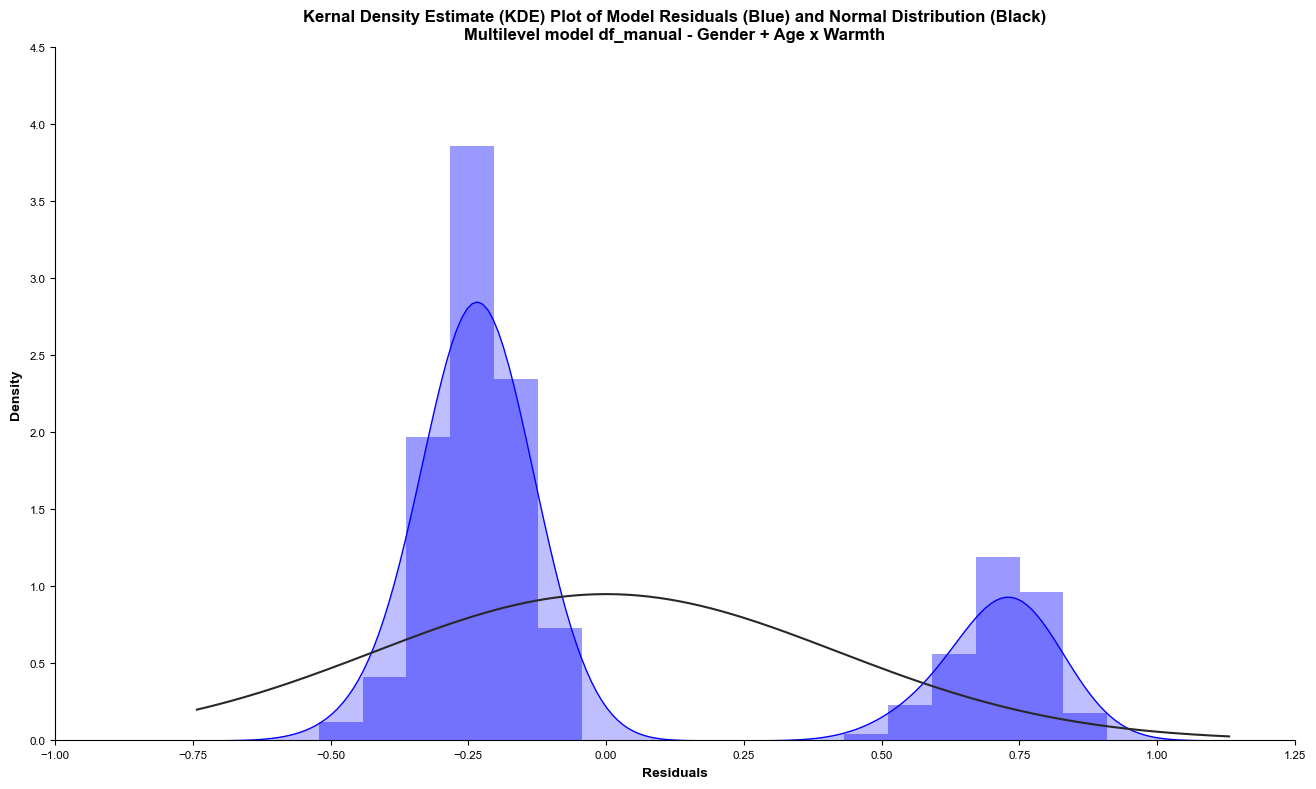

/opt/homebrew/Caskroom/mambaforge/base/envs/study1_3.10/lib/python3.10/site-packages/statsmodels/graphics/gofplots.py:1045: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.0, 0.0, 1.0, 1)). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)
/var/folders/46/q15p556n1dd63z6gkwyh896c0000gn/T/ipykernel_36214/3226161328.py:56: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show('notebook')


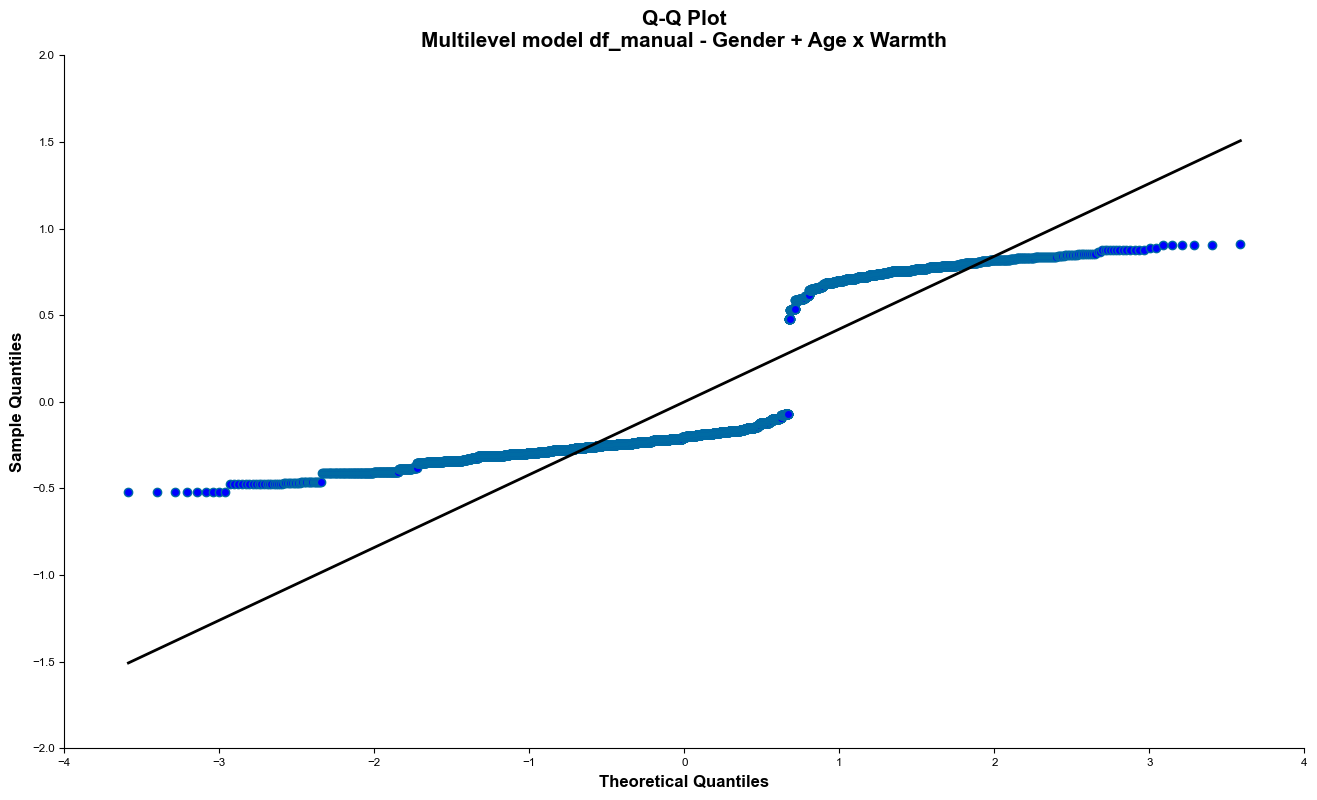

Warmth Test of Normality:
--------------------------------------------------------------------------------
Statistic :  1025.234298248542
p-value :  2.361569908630636e-223


Warmth Skewness-Kurtosis Test of Normality:
--------------------------------------------------------------------------------
Statistic :  -14.758769302605415
p-value :  2.7016581683394153e-49


Warmth Shapir-Wilk Test of Normality:
--------------------------------------------------------------------------------
Statistic :  0.7096412181854248
p-value :  0.0


Warmth Anderson-Darling Test of Normality:
--------------------------------------------------------------------------------
Statistic :  838.6350172801021
p-value :  [0.576 0.656 0.786 0.917 1.091]




/opt/homebrew/Caskroom/mambaforge/base/envs/study1_3.10/lib/python3.10/site-packages/scipy/stats/_morestats.py:1816: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")
/var/folders/46/q15p556n1dd63z6gkwyh896c0000gn/T/ipykernel_36214/3226161328.py:108: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show('notebook')


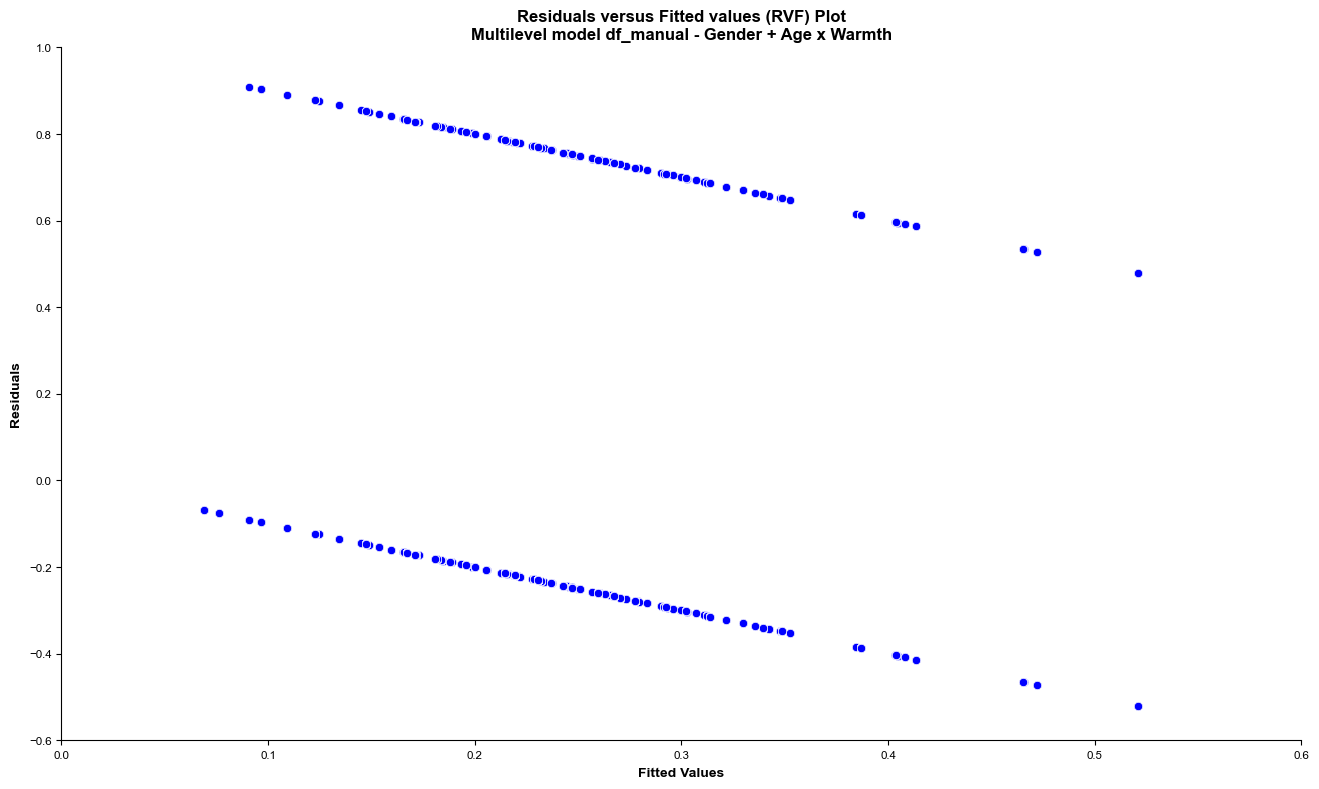

White’s Lagrange Multiplier Test for Heteroscedasticity
--------------------------------------------------------------------------------
LM Statistic 18.525862219198242
LM-Test p-value 0.0023546764073273186
F-Statistic 3.7129601241713748
F-Test p-value 0.0023398365575856782




++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++


Dependent Variable: Competence:


/opt/homebrew/Caskroom/mambaforge/base/envs/study1_3.10/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/opt/homebrew/Caskroom/mambaforge/base/envs/study1_3.10/lib/python3.10/site-packages/statsmodels/regression/mixed_linear_model.py:2200: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(
/opt/homebrew/Caskroom/mambaforge/base/envs/study1_3.10/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/opt/homebrew/Caskroom/mambaforge/base/envs/study1_3.10/lib/python3.10/site-packages/statsmodels/regression/mixed_linear_model.py:2200: ConvergenceWarning: Retrying MixedLM optimization with cg
  warnings.warn(
/opt/homebrew/Caskroom/mambaforge/base/en

                          Mixed Linear Model Regression Results
Model:                       MixedLM            Dependent Variable:            Competence
No. Observations:            5978               Method:                        REML      
No. Groups:                  117                Scale:                         0.2230    
Min. group size:             12                 Log-Likelihood:                -4122.6927
Max. group size:             166                Converged:                     No        
Mean group size:             51.1                                                        
-----------------------------------------------------------------------------------------
                                               Coef.  Std.Err.   z    P>|z| [0.025 0.975]
-----------------------------------------------------------------------------------------
Intercept                                       0.445    0.078  5.739 0.000  0.293  0.598
C(Gender, Treatment("Female"))[T.Mal

/opt/homebrew/Caskroom/mambaforge/base/envs/study1_3.10/lib/python3.10/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/var/folders/46/q15p556n1dd63z6gkwyh896c0000gn/T/ipykernel_36214/3226161328.py:40: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show('notebook')


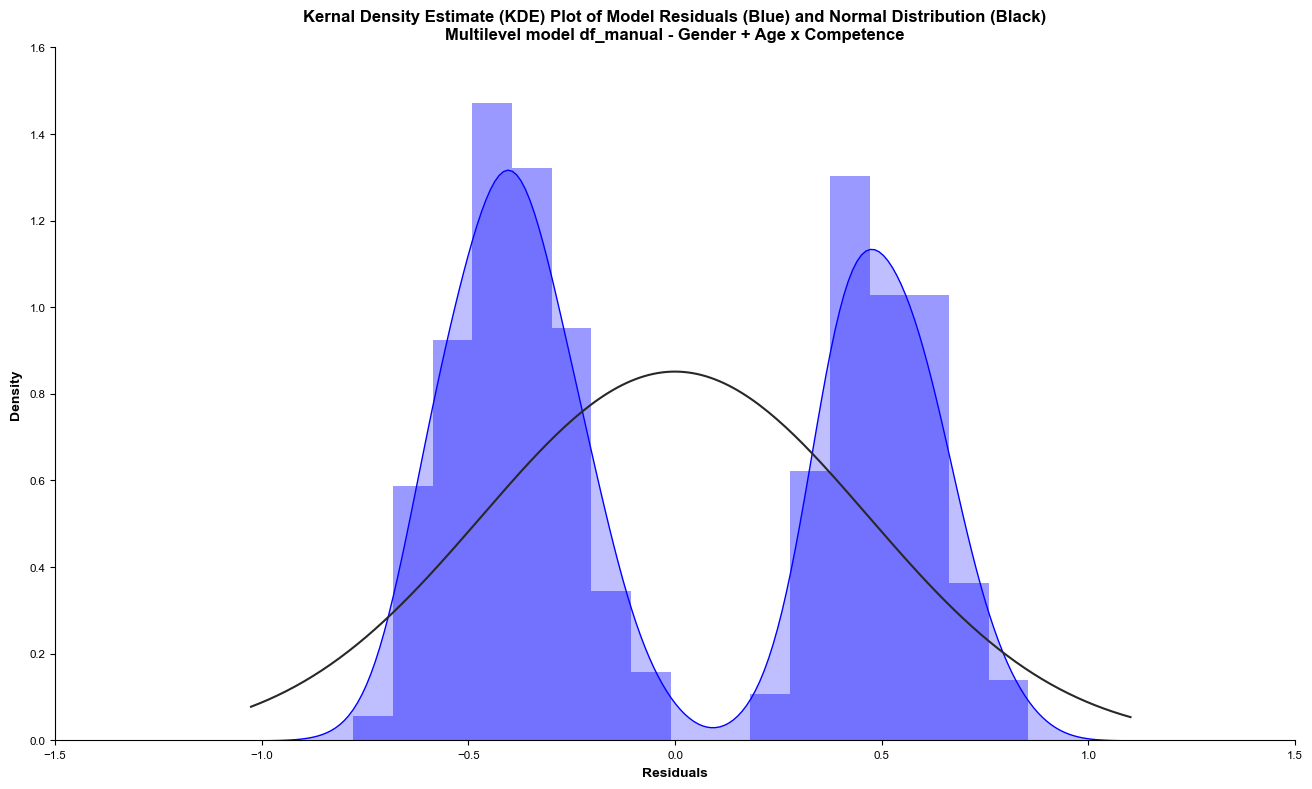

/opt/homebrew/Caskroom/mambaforge/base/envs/study1_3.10/lib/python3.10/site-packages/statsmodels/graphics/gofplots.py:1045: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.0, 0.0, 1.0, 1)). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)
/var/folders/46/q15p556n1dd63z6gkwyh896c0000gn/T/ipykernel_36214/3226161328.py:56: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show('notebook')


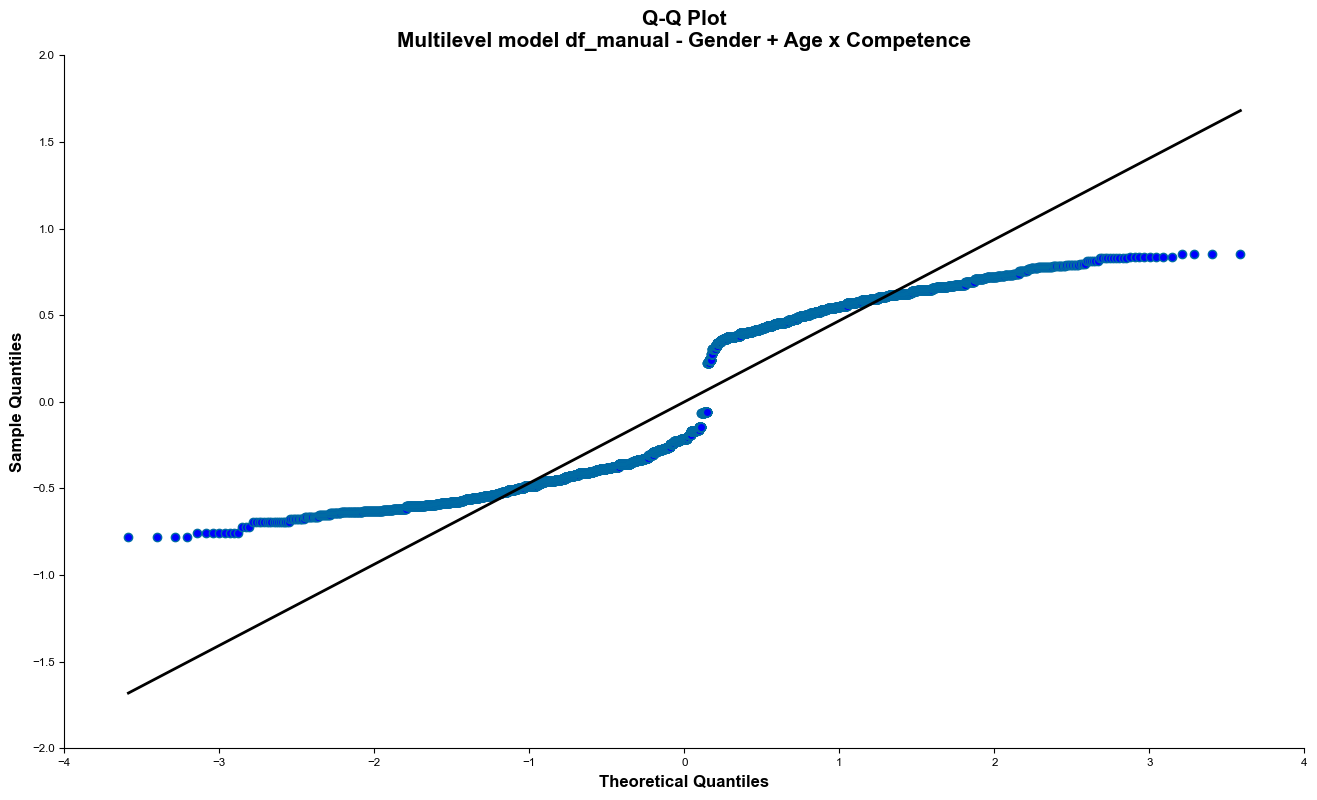

Competence Test of Normality:
--------------------------------------------------------------------------------
Statistic :  27870.068240282795
p-value :  0.0


Competence Skewness-Kurtosis Test of Normality:
--------------------------------------------------------------------------------
Statistic :  166.8470686682317
p-value :  0.0


Competence Shapir-Wilk Test of Normality:
--------------------------------------------------------------------------------
Statistic :  0.8636727333068848
p-value :  0.0


Competence Anderson-Darling Test of Normality:
--------------------------------------------------------------------------------
Statistic :  360.12758745679093
p-value :  [0.576 0.656 0.786 0.917 1.091]




/opt/homebrew/Caskroom/mambaforge/base/envs/study1_3.10/lib/python3.10/site-packages/scipy/stats/_morestats.py:1816: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")
/var/folders/46/q15p556n1dd63z6gkwyh896c0000gn/T/ipykernel_36214/3226161328.py:108: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show('notebook')


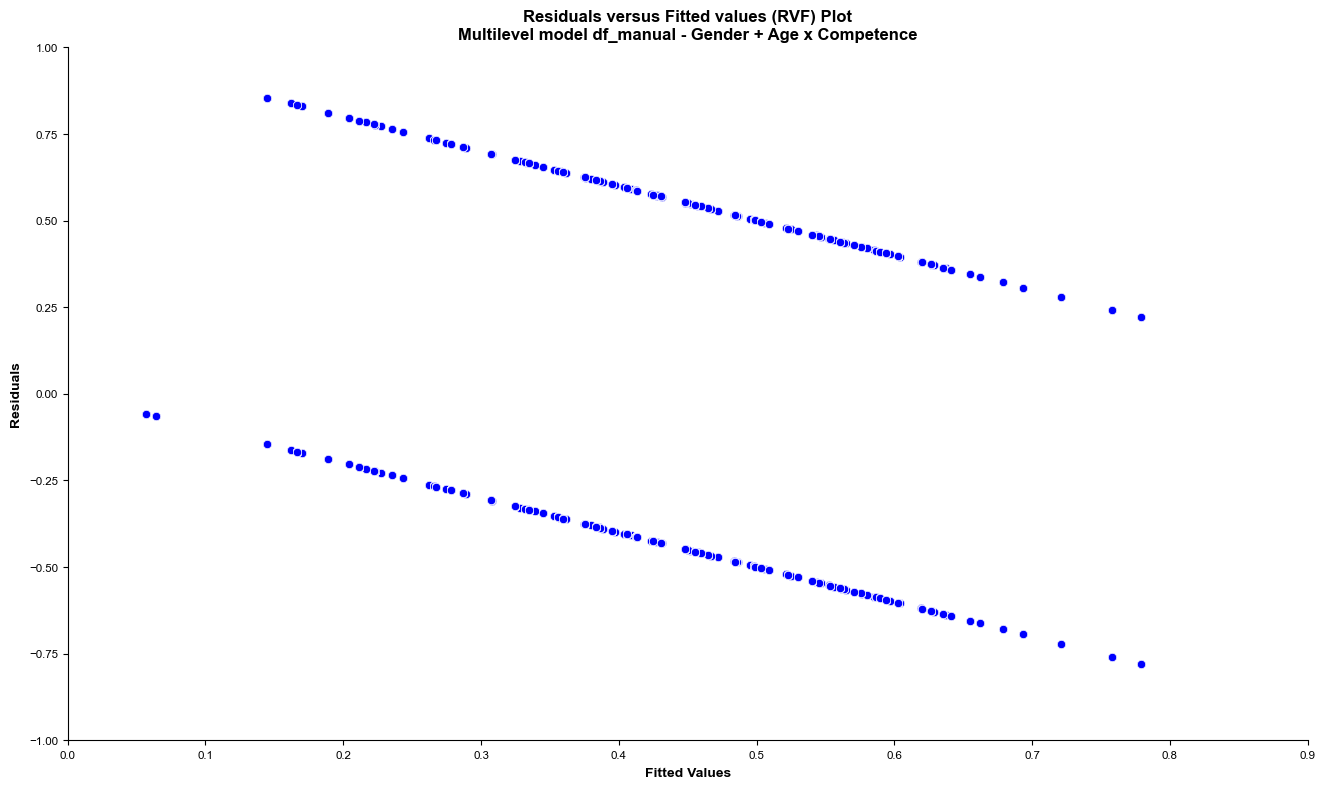

White’s Lagrange Multiplier Test for Heteroscedasticity
--------------------------------------------------------------------------------
LM Statistic 9.523439768728693
LM-Test p-value 0.08992091116278654
F-Statistic 1.9058123702054133
F-Test p-value 0.08990691839072266




++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++




In [28]:
for df_name, df in dataframes.items():
    df['Intercept'] = 1

    print('+'*120)
    print(f'====== RESULTS FOR {df_name} ======')

    for dv in dvs:
        save_name = f'Multilevel model {df_name} - {list(iter(ivs_dict))[0]} + {list(iter(ivs_dict))[1]} x {dv}'
        endog = df[dv]
        exog0 = df[['Intercept', f'{list(iter(ivs_dict))[0]}']]
        exog1 = df[['Intercept', f'{list(iter(ivs_dict))[1]}']]

        print('='*80)
        print(f'Dependent Variable: {dv}:')
        print('='*80)
        # formula = f'dv ~ C(iv, Treatment("Reference_Category") + C(iv, Treatment("Reference_Category")'

        model = smf.mixedlm(
            formula=
            f'''{dv} ~ C({list(iter(ivs_dict))[0]}, Treatment("{ivs_dict[f'{list(iter(ivs_dict))[0]}'][0]}")) +
            C({list(iter(ivs_dict))[1]}, Treatment("{ivs_dict[f'{list(iter(ivs_dict))[1]}'][0]}"))''',
            data=df, groups=df['Job ID'].astype(str)
        ).fit()
        print(model.summary())
        df_model = pd.DataFrame(index=['Descriptives', 'Results'], columns=[f'{save_name}'])
        df_model[f'{save_name}']['Descriptives'] = model.summary().tables[0]
        df_model[f'{save_name}']['Results'] = model.summary().tables[1]

        df_model.to_csv(f'{table_save_path}{save_name.split(" model")[0].lower() + " model" + save_name.split(" model")[1]}.csv', header=True, index=True, index_label=['Index col: Descriptives and Results'])

        # Normality Tests (https://www.pythonfordatascience.org/mixed-effects-regression-python/)
        ## Residual and Kernal Density Estimate (KDE) Plot for Homoskedasticity
        fig = plt.figure(figsize = (16, 9))

        ax = sns.distplot(model.resid, hist = True, kde_kws = {"shade" : True, "lw": 1}, fit = scipy.stats.norm, kde=True, color='blue')

        ax.set_title(f"Kernal Density Estimate (KDE) Plot of Model Residuals (Blue) and Normal Distribution (Black)\n{save_name}")
        ax.set_xlabel("Residuals")
        plt.ion()
        fig.show('notebook')
        plt.pause(.001)

        # Q-Q Plot
        fig = plt.figure(figsize = (16, 9))
        ax = fig.add_subplot(111)

        qq = sm.qqplot(model.resid, dist = scipy.stats.norm, line = 's', ax = ax, color='blue', markerfacecolor='blue')
        ax.set_title(f"Q-Q Plot\n{save_name}",fontsize=15)
        ax.xaxis.get_label().set_fontsize(12)
        ax.yaxis.get_label().set_fontsize(12)
        ax.get_lines()[0].set_color('black')
        ax.get_lines()[0].set_linewidth('2')
        ax.get_lines()[1].set_color('black')
        ax.get_lines()[1].set_linewidth('2')
        plt.ion()
        fig.show('notebook')
        plt.pause(.001)

        # Test of Normality
        norm = scipy.stats.normaltest(model.resid)

        print('='*80)
        print(f'{dv} Test of Normality:')
        print('-'*80)
        for key, val in dict(zip(normality_tests_labels, norm)).items():
            print(key,': ', val) # Significant
        print('\n')

        # Skewness-Kurtosis Test of Normality
        norm_sk = scipy.stats.kurtosistest(model.resid)

        print('='*80)
        print(f'{dv} Skewness-Kurtosis Test of Normality:')
        print('-'*80)
        for key, val in dict(zip(normality_tests_labels, norm_sk)).items():
            print(key,': ', val) # Significant
        print('\n')

        # Shapir-Wilk Test of Normality
        norm_res = scipy.stats.shapiro(model.resid)

        print('='*80)
        print(f'{dv} Shapir-Wilk Test of Normality:')
        print('-'*80)
        for key, val in dict(zip(normality_tests_labels, norm_res)).items():
            print(key,': ', val) # Significant
        print('\n')

        # Anderson-Darling Test of Normality
        norm_and = scipy.stats.anderson(model.resid)

        print('='*80)
        print(f'{dv} Anderson-Darling Test of Normality:')
        print('-'*80)
        for key, val in dict(zip(normality_tests_labels, norm_and)).items():
            print(key,': ', val) # Significant
        print('\n')

        # Residuals versus Fitted values (RVF) Plot for Homoskedasticity
        fig = plt.figure(figsize = (16, 9))

        ax = sns.scatterplot(y = model.resid, x = model.fittedvalues, color='blue')

        ax.set_title(f"Residuals versus Fitted values (RVF) Plot\n{save_name}")
        ax.set_xlabel("Fitted Values")
        ax.set_ylabel("Residuals")
        plt.ion()
        fig.show('notebook')
        plt.pause(.001)

        # White’s Lagrange Multiplier Test for Heteroscedasticity
        het_white_res = het_white(model.resid, model.model.exog)

        het_white_labels = ["LM Statistic", "LM-Test p-value", "F-Statistic", "F-Test p-value"]

        print('='*80)
        print('White’s Lagrange Multiplier Test for Heteroscedasticity')
        print('-'*80)
        for key, val in dict(zip(het_white_labels, het_white_res)).items():
            print(key, val)
        print('\n')
        print('\n')
        print('+'*120)
        print('\n')


## Specification Curve Analysis

In [29]:
for df_name, df in dataframes.items():

    df.columns

    print(f'====== RESULTS FOR {df_name} ======')

    x_exog_1 = 'Gender_Female'
    x_exog_2 = 'Gender_Male'
    x_exog_3 = 'Gender_Mixed'
    x_exog_4 = 'Age_Older'
    x_exog_5 = 'Age_Younger'
    x_exog_6 = 'Age_Mixed'

    x_exog = [
        x_exog_1, x_exog_2, x_exog_3, x_exog_4, x_exog_5, x_exog_6
    ]

    y_endog_1 = 'Warmth'
    y_endog_2 = 'Competence'

    y_endog = [y_endog_1, y_endog_2]

    controls = ['English Requirement', 'Dutch Requirement', 'Job Description num_words', 'Job Description num_chars_no_whitespact_and_punt']

    # x = sm.add_constant(df[x_exog])
    # ols = sm.OLS(df['Warmth'], x).fit()

    sc = specy.SpecificationCurve(df, y_endog, x_exog, controls)
    sc.fit(estimator=sm.Logit)



====== RESULTS FOR df_manual ======


╭─────────────────────────────── Traceback (most recent call last) ────────────────────────────────╮
│ /var/folders/46/q15p556n1dd63z6gkwyh896c0000gn/T/ipykernel_36214/918398753.py:29 in <module>     │
│                                                                                                  │
│ [Errno 2] No such file or directory:                                                             │
│ '/var/folders/46/q15p556n1dd63z6gkwyh896c0000gn/T/ipykernel_36214/918398753.py'                  │
│                                                                                                  │
│ /opt/homebrew/Caskroom/mambaforge/base/envs/study1_3.10/lib/python3.10/site-packages/specificati │
│ on_curve/__init__.py:164 in fit                                                                  │
│                                                                                                  │
│   161 │   │   # If any of always include in any other list, remove it from other list            │
│   162 │   │   self.controls = _remove_overlapping_vars(self.controls, self.always_include)       │
│   163 │   │   self.x_exog = _remove_overlapping_vars(self.x_exog, self.always_include)           │
│ ❱ 164 │   │   self.ctrl_combs = self._compute_combinations()                                     │
│   165 │   │   self.df_r = self._spec_curve_regression()                                          │
│   166 │   │   print("Fit complete")                                                              │
│   167                                                                                            │
│                                                                                                  │
│ /opt/homebrew/Caskroom/mambaforge/base/envs/study1_3.10/lib/python3.10/site-packages/specificati │
│ on_curve/__init__.py:185 in _compute_combinations                                                │
│                                                                                                  │
│   182 │   │   Changes df to have dummies for cat expand columns.                                 │
│   183 │   │   """                                                                                │
│   184 │   │   init_cols = self.y_endog + self.x_exog + self.controls + self.always_include       │
│ ❱ 185 │   │   self.df = self.df[init_cols]                                                       │
│   186 │   │   new_cols = []                                                                      │
│   187 │   │   # Warning: hard-coded prefix                                                       │
│   188 │   │   if self.cat_expand != []:                                                          │
│                                                                                                  │
│ /opt/homebrew/Caskroom/mambaforge/base/envs/study1_3.10/lib/python3.10/site-packages/pandas/core │
│ /frame.py:3813 in __getitem__                                                                    │
│                                                                                                  │
│    3810 │   │   else:                                                                            │
│    3811 │   │   │   if is_iterator(key):                                                         │
│    3812 │   │   │   │   key = list(key)                                                          │
│ ❱  3813 │   │   │   indexer = self.columns._get_indexer_strict(key, "columns")[1]                │
│    3814 │   │                                                                                    │
│    3815 │   │   # take() does not accept boolean indexers                                        │
│    3816 │   │   if getattr(indexer, "dtype", None) == bool:                                      │
│                                                                                                  │
│ /opt/homebrew/Caskroom/mambaforge/base/envs/study1_3.10/lib

In [1]:
df_manual = pd.read_pickle(f'{df_save_dir}df_manual_sentiment_spacy_nltk.pkl').reset_index(drop=True)

NameError: name 'pd' is not defined

In [38]:
for df_name, df in dataframes.items():

    df.columns

    print(f'====== RESULTS FOR {df_name} ======')

    x_exog_1 = 'Gender_Female_% per Sector'
    x_exog_2 = 'Gender_Male_% per Sector'
    x_exog_3 = 'Age_Older_% per Sector'
    x_exog_4 = 'Age_Younger_% per Sector'
    # x_exog_5 = 'Gender_Female'
    # x_exog_6 = 'Gender_Male'
    # x_exog_7 = 'Gender_Mixed'
    # x_exog_8 = 'Age_Older'
    # x_exog_9 = 'Age_Younger'
    # x_exog_10 = 'Age_Mixed'

    x_exog = [
        x_exog_1, x_exog_2, x_exog_3, x_exog_4, 
        # x_exog_5, x_exog_6, x_exog_7, x_exog_8, x_exog_9, x_exog_10
    ]

    y_endog_1 = 'Warmth'
    y_endog_2 = 'Competence'

    y_endog = [y_endog_1, y_endog_2]

    controls = [
        'English Requirement', 'Dutch Requirement',
        # 'Job Description num_words',
        # 'Job Description num_unique_words',
        # 'Job Description num_chars',
        # 'Job Description num_chars_no_whitespact_and_punt'
    ]

    # n_grams_counts = []
    # for embedding_library, ngram_num in tqdm_product(embedding_libraries_list, ngrams_list):
    #     controls.extend(
    #         [
    #             f'Job Description {embedding_library}_{ngram_num}grams_count',
    #             f'Job Description {embedding_library}_{ngram_num}grams_abs_word_freq',
    #             f'Job Description {embedding_library}_{ngram_num}grams_abs_word_perc',
    #             f'Job Description {embedding_library}_{ngram_num}grams_abs_word_perc_cum'
    #         ]
    #     )

    sc = specy.SpecificationCurve(df, y_endog, x_exog, controls)
    sc.fit(estimator=sm.Logit)


====== RESULTS FOR df_manual ======
Optimization terminated successfully.
         Current function value: 0.562574
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.562574
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.562574
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.562574
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.562571
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.562571
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.562571
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.562571
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.562514
         Iterations 6
Optimization terminated successfully.
        

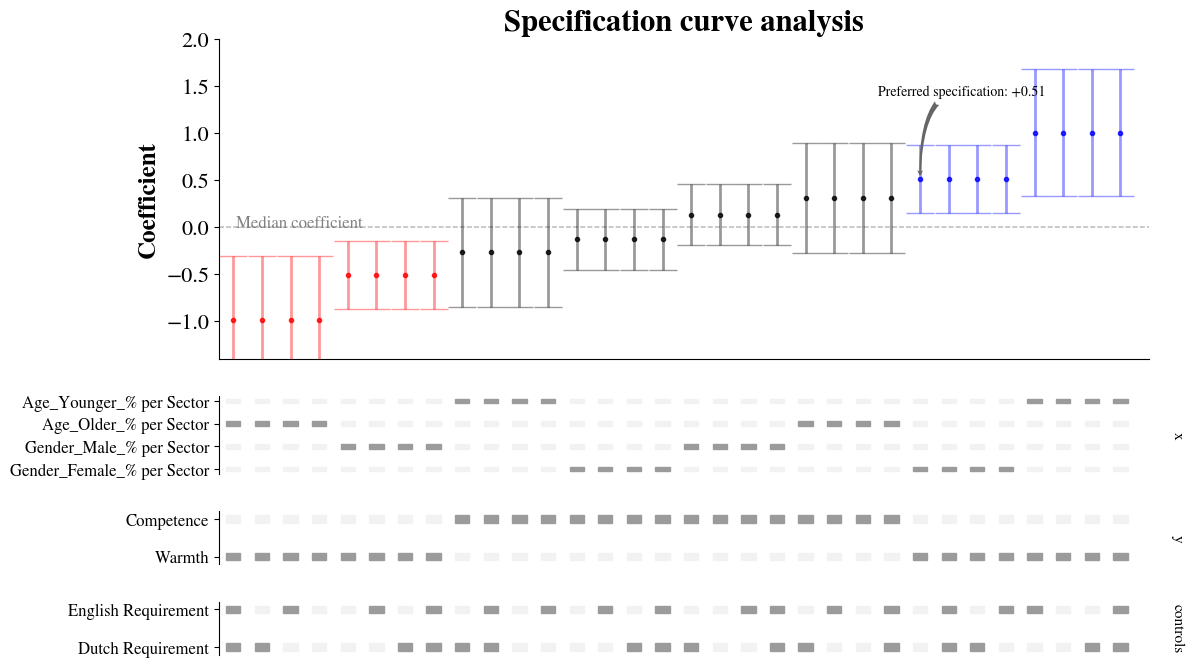

In [39]:
sc.plot(preferred_spec=['Gender_Female_% per Sector', 'Warmth'])


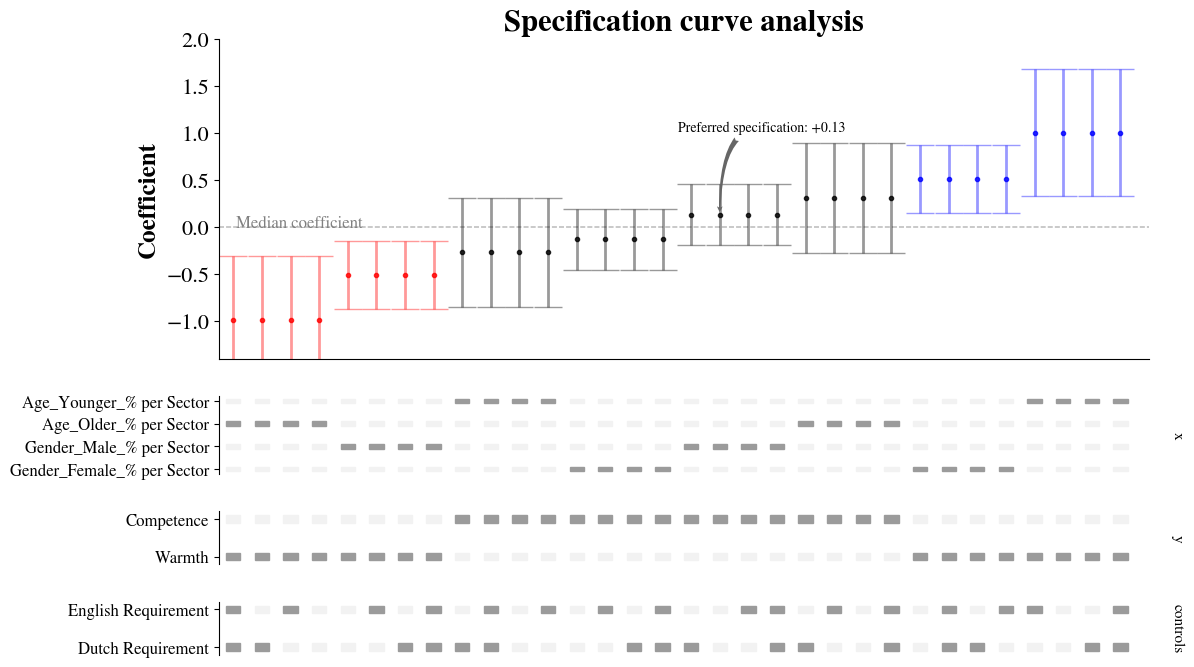

In [32]:
sc.plot(preferred_spec=['Gender_Male_% per Sector', 'Competence'])


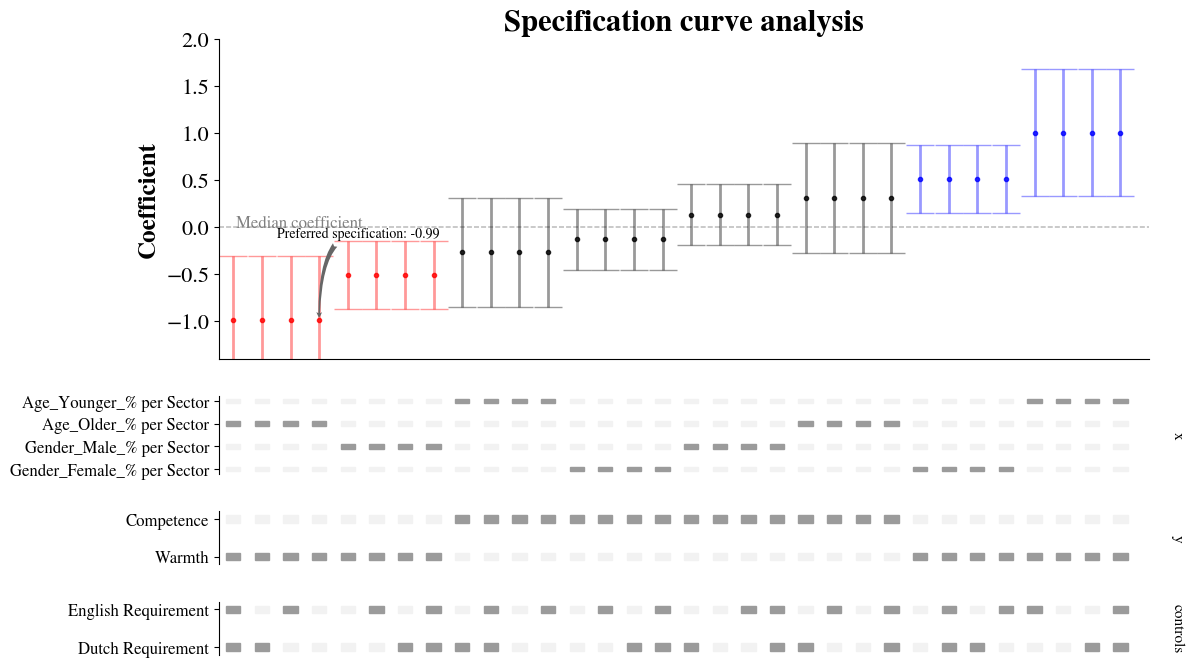

In [33]:
sc.plot(preferred_spec=['Age_Older_% per Sector', 'Warmth'])


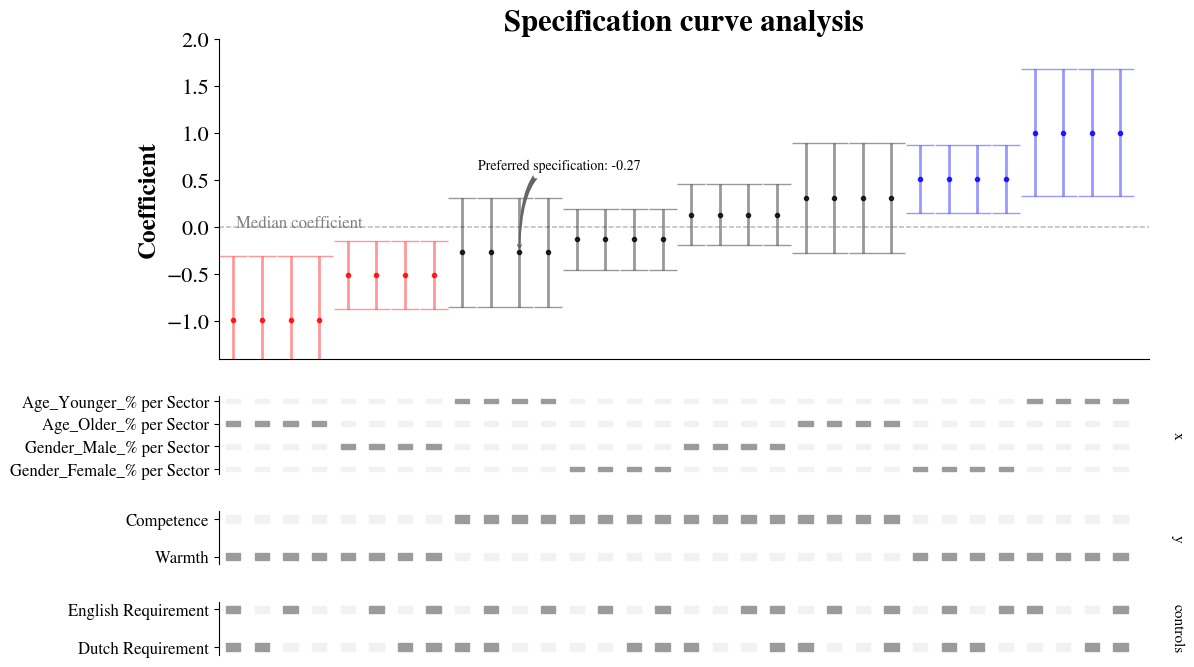

In [34]:
sc.plot(preferred_spec=['Age_Younger_% per Sector', 'Competence'])


In [35]:
sc.df_r.head()

x_exog          y_endog                      Results                        Coefficient                   Specification                     bse                   conf_int                                       pvalues                                      SpecificationCounts                  preferred color_coeff  coeff_pvals
Specification No.                                                                                                                                                                                                                                                                                                                                                
0                    Age_Older_% per Sector  Warmth  <statsmodels.discrete.discrete_model.BinaryRes...    -0.99      [Age_Older_% per Sector, Dutch Requirement, En... 0.35  [-1.6744232755619608, -0.3151174274457772]  {'Age_Older_% per Sector': 0.00412174568935964...  {'Age_Older_% per Sector': 1, 'Dutch Requireme...    False        red        0.00    
1                    Age_Older_% per Sector  Warmth  <statsmodels.discrete.discrete_model.BinaryRes...    -0.99      [Age_Older_% per Sector, Dutch Requirement, Wa... 0.35  [-1.6744232755619608, -0.3151174274457772]  {'Age_Older_% per Sector': 0.00412174568935964...  {'Age_Older_% per Sector': 1, 'Dutch Requireme...    False        red        0.00    
2                    Age_Older_% per Sector  Warmth  <statsmodels.discrete.discrete_model.BinaryRes...    -0.99      [Age_Older_% per Sector, English Requirement, ... 0.35  [-1.6744232755619608, -0.3151174274457772]  {'Age_Older_% per Sector': 0.00412174568935964...  {'Age_Older_% per Sector': 1, 'English Require...    False        red        0.00    
3                    Age_Older_% per Sector  Warmth  <statsmodels.discrete.discrete_model.BinaryRes...    -0.99                       [Age_Older_% per Sector, Warmth] 0.35  [-1.6744232755619608, -0.3151174274457772]  {'Age_Older_% per Sector': 0.00412174568935964...         {'Age_Older_% per Sector': 1, 'Warmth': 1}    False        red        0.00    
4                  Gender_Male_% per Sector  Warmth  <statsmodels.discrete.discrete_model.BinaryRes...    -0.51                     [Gender_Male_% per Sector, Warmth] 0.18  [-0.8733054351765585, -0.1507900205610756]  {'Gender_Male_% per Sector': 0.005468474372757...       {'Gender_Male_% per Sector': 1, 'Warmth': 1}    False        red        0.01

In [36]:
df_coeff_p = sc.df_r.loc[sc.df_r['coeff_pvals'] < 0.05].sort_values(by=['Coefficient'], ascending=False)[['Specification', 'Coefficient', 'coeff_pvals']].head(10)

In [37]:
df_coeff_p

Specification                     Coefficient  coeff_pvals
Specification No.                                                                             
28                 [Age_Younger_% per Sector, English Requirement...     1.00         0.00    
29                                [Age_Younger_% per Sector, Warmth]     1.00         0.00    
30                 [Age_Younger_% per Sector, Dutch Requirement, ...     1.00         0.00    
31                 [Age_Younger_% per Sector, Dutch Requirement, ...     1.00         0.00    
24                              [Gender_Female_% per Sector, Warmth]     0.51         0.01    
25                 [Dutch Requirement, English Requirement, Gende...     0.51         0.01    
26                 [Dutch Requirement, Gender_Female_% per Sector...     0.51         0.01    
27                 [English Requirement, Gender_Female_% per Sect...     0.51         0.01    
4                                 [Gender_Male_% per Sector, Warmth]    -0.51         0.01    
5                  [English Requirement, Gender_Male_% per Sector...    -0.51         0.01